In [1]:
# Classification of wood image with defects——2021.11.24
#import tensorflow.compat.v1 as tf
#tf.compat.v1.disable_eager_execution()
import tensorflow as tf
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt # plt 用于显示图片
from PIL import Image
from matplotlib.pyplot import MultipleLocator
from mpl_toolkits.mplot3d import Axes3D
import time
#import h5py
#import cv2
from pylab import *
from numpy import *
#from skimage import data, io, transform, color, measure, segmentation, morphology, feature, filters # Gabor
#from skimage.feature import greycomatrix, greycoprops, local_binary_pattern # GLCM
#from sklearn.metrics import confusion_matrix # Confusion_matrix
print('loading complete')

D:\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:461: FutureWa

loading complete


In [3]:
# function definition
def ReLU(x):
    y = np.maximum(0, x)
    return y
# IoU computation
def IoU_cmp(c1, c2):
    # c1, c2 are coordinates of two boxes
    a1 = ReLU(c2[1, 0] - c1[0, 0]) * ReLU(c2[1, 1] - c1[0, 1])
    a2 = ReLU(c1[1, 0] - c2[0, 0]) * ReLU(c1[1, 1] - c2[0, 1])
    a3 = ReLU(c1[1, 0] - c2[0, 0]) * ReLU(c2[1, 1] - c1[0, 1])
    a4 = ReLU(c2[1, 0] - c1[0, 0]) * ReLU(c1[1, 1] - c2[0, 1])
    a5 = ReLU(c1[1, 0] - c1[0, 0]) * ReLU(c1[1, 1] - c1[0, 1]) # area of c1
    a6 = ReLU(c2[1, 0] - c2[0, 0]) * ReLU(c2[1, 1] - c2[0, 1]) # area of c2
    a = np.array([a1, a2, a3, a4, a5, a6])
    y1 = a.min()
    y2 = a.max()
    y3 = y1 / y2
    return a1, a2, a3, a4, a5, a6, y3

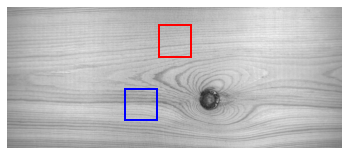

(0, 0, 0, 312736, 50176, 50176, 0.0)


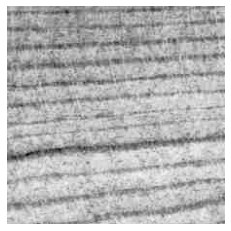

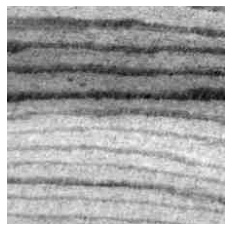

[[0.32941176 0.32941176 0.32941176 0.32941176 0.32941176 0.32941176
  0.32941176 0.32941176 0.32941176 0.32941176]
 [0.32941176 0.32941176 0.32941176 0.32941176 0.32941176 0.32941176
  0.32941176 0.32941176 0.33333333 0.33333333]
 [0.3372549  0.3372549  0.3372549  0.3372549  0.3372549  0.3372549
  0.3372549  0.3372549  0.3372549  0.3372549 ]
 [0.34117647 0.34117647 0.34117647 0.34117647 0.34117647 0.34117647
  0.34117647 0.34117647 0.34509804 0.34509804]
 [0.34901961 0.34901961 0.34901961 0.34901961 0.34901961 0.34901961
  0.34901961 0.34901961 0.35294118 0.35294118]
 [0.35294118 0.35294118 0.35294118 0.35294118 0.35294118 0.35294118
  0.35294118 0.35294118 0.36078431 0.36078431]
 [0.36078431 0.36078431 0.36078431 0.36078431 0.36078431 0.36078431
  0.36078431 0.36078431 0.36470588 0.36470588]
 [0.36078431 0.36078431 0.36078431 0.36078431 0.36078431 0.36078431
  0.36078431 0.36078431 0.36862745 0.36862745]
 [0.36470588 0.36470588 0.36470588 0.36862745 0.37254902 0.37254902
  0.37647059 

In [4]:
# data extract
p1 = mpimg.imread('E:\pythonworkspace\待测图像_宏观节子\wood_image21.jpg') / 255
r = 224
m = 130
n = 1080
#fig = plt.figure()
fig, ax = plt.subplots(1)
ax.imshow(p1, cmap = 'gray')
rect = plt.Rectangle((n, m), r, r, fill = False, linewidth = 2, edgecolor = 'red')
b1 = np.array([[m, n], [m + r, n + r]])
ax.add_patch(rect)
m1 = 580
n1 = 840
r1 = 224
c1 = 224
rect = plt.Rectangle((n1, m1), c1, r1, fill = False, linewidth = 2, edgecolor = 'blue')
b2 = np.array([[m1, n1], [m1 + r1, n1 + c1]])
ax.add_patch(rect)
plt.axis('off') # 不显示坐标轴
#plt.imshow(p1, cmap = 'gray')
plt.show()
ratio = IoU_cmp(b1, b2)

print(ratio)

gt = p1[m:m + r, n:n + r]
plt.imshow(gt, cmap = 'Greys_r') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
gt = p1[m1:m1 + r1, n1:n1 + c1]
plt.imshow(gt, cmap = 'gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
print(p1[0:10, 0:10])

x_train1: (100, 224, 224, 1)


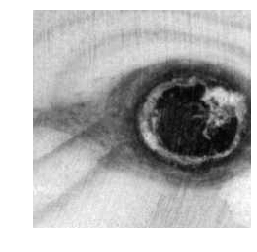

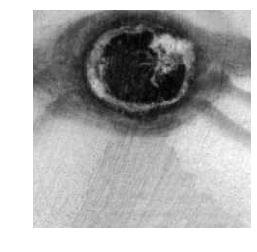

'Mon Mar 28 17:59:41 2022'

In [4]:
# train set preperation(dead knot)
p1 = mpimg.imread('E:\文件管理\木材工业研究所\manuscript-2020.05.27\待测图像2\wood_image32.jpg') / 255 
# 32 dead knot; 23 patial live knot; 18 branch knot; 3 live knot
r = 224
m = 1
n = 1200
t = np.zeros([100, r, r, 1], dtype = np.float32)
k = 0
for i in range(10):
    x = m + 6 * i
    for j in range(10):
        y = n + 6 * j
        t[k, :, :, 0] = p1[x:x + r, y:y + r]
        k = k + 1
x_train1 = t
print('x_train1:', t.shape)
plt.imshow(t[0, :, :, 0], cmap = 'gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
plt.imshow(t[99, :, :, 0], cmap = 'gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
time.asctime()

In [2]:
nm = np.array([[1.2,2.7,2.8],[3.2,2.2,1.2],[1.4,2.2,1.5]], dtype = np.float32)
new_arr = np.median(nm)
print(new_arr)

2.2


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

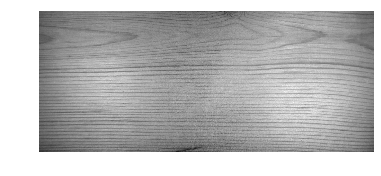

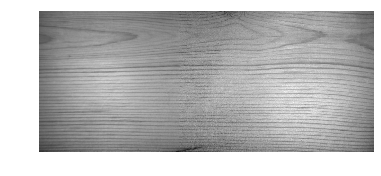

0.052493584079699215
0.051709853


In [16]:
def MedianFilter(src, k, padding):
    #imarray = np.array(Image.open(src))
    height, width = src.shape
    n = 0
    if not padding:
        edge = int((k - 1) / 2)
        if height - 1 - edge <= edge or width - 1 - edge <= edge:
            print("The parameter k is to large.")
            return None
        new_arr = np.zeros((height, width), dtype = np.float32)
        for i in range(height):
            print(i)
            for j in range(width):
                n = n + 1
                if i <= edge - 1 or i >= height - 1 - edge or j <= edge - 1 or j >= height - edge - 1:
                    new_arr[i, j] = src[i, j]
                else:
                    # nm:neighbour matrix
                    nm = src[i - edge:i + edge + 1, j - edge:j + edge + 1]
                    #new_arr[i, j] = np.median(nm)
                    new_arr[i, j] = np.mean(nm)
        #new_im = Image.fromarray(new_arr)
        #new_im.save(dst)
    return new_arr

I = mpimg.imread('E:\文件管理\木材工业研究所\manuscript-2020.05.27\待测图像2\wood_image8.jpg') / 255
m = 100
n = 300
p1 = I
#p1 = I[m:m + 200, n:n + 200]
#p1 = t[0, :, :, 0]
p2 = MedianFilter(p1, 7, None)
plt.imshow(p1, cmap = 'gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
plt.imshow(p2, cmap = 'gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
#m = 100
#n = 300
#p1 = I[m:m + 768, n:n + 768]
sum_m = np.sum(p1, 1)
print(np.std(p1))
print(np.std(p2))


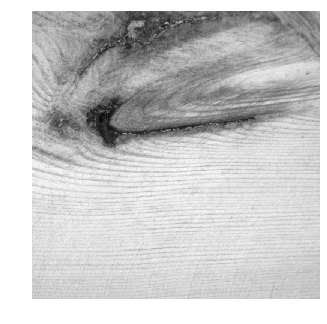

(768, 768) (768, 768) (768, 768)


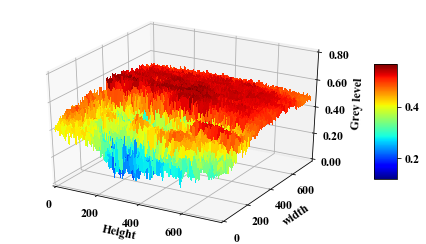

(768, 768)


In [134]:
#p1 = p2
I = mpimg.imread('E:\文件管理\木材工业研究所\manuscript-2020.05.27\待测图像2\wood_image14.jpg') / 255
m = 100
n = 1300
p1 = I[m:m + 768, n:n + 768]
sum_m = np.sum(p1, 0)
plt.imshow(p1, cmap = 'gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.subplots_adjust(top = 1, bottom = 0, left = 0, right = 1, hspace = 0, wspace = 0)
plt.margins(0, 0)
#plt.imsave('TwoD.jpg', p1)
plt.savefig('TwoD1.jpg', dpi = 100, bbox_inches = 'tight', pad_inches = 0)
plt.show()

fig = plt.figure()
ax = plt.gca(projection = '3d')
ps = p1.shape
X = np.arange(0, int(ps[0]), 1)
Y = np.arange(0, int(ps[1]), 1)
X, Y = np.meshgrid(Y, X)
#R = np.sqrt(X**2 + Y**2)
#Z = np.sin(R)
Z = p1
surf = ax.plot_surface(X, Y, Z, cmap = cm.jet, linewidth = 0, antialiased = False)
print(X.shape, Y.shape, Z.shape)

#cset = ax.contour(X, Y, Z, cmap = cm.coolwarm)
#cset = ax.contourf(X, Y, Z, zdir = 'z', offset = 0, cmap = cm.jet)
#cset = ax.contourf(X, Y, Z, zdir = 'x', offset = 0, cmap = cm.jet)
#cset = ax.contourf(X, Y, Z, zdir = 'y', offset = 1000, cmap = cm.jet)

ax.set_xlabel('Height')
#font = {'family':'Times New Roman', 'weight':'bold', 'style':'normal', 'size':12}
#plt.xlabel('Height', fontdict = font)
#plt.ylabel('width', fontdict = font)
#plt.zlabel('Grey level', fontdict = font)
ax.set_ylabel('width')
ax.set_zlabel('Grey level')
ax.set_zlim(0, 0.8)

ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink = 0.5, aspect = 5)

x_major_locator = MultipleLocator(200) # x axis interval setting
y_major_locator = MultipleLocator(200) # y axis interval setting
z_major_locator = MultipleLocator(0.2) # z axis interval setting

#ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
#ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_locator(z_major_locator)

plt.xticks(fontproperties = 'Times New Roman', size = 12)
plt.yticks(fontproperties = 'Times New Roman', size = 12)
ax.tick_params(axis = 'z', labelsize = 12)
#plt.rcParams['font.family'] = 'Times New Roman'
#plt.rcParams['font.size'] = 12

#plt.figure(figsize = (12, 8), dpi = 300)
#fig1 = plt.gcf()
#f1 = plt.imshow(p1, cmap = 'gray') # 显示图片
plt.subplots_adjust(top = 0.8, bottom = 0, left = 0, right = 1, hspace = 0, wspace = 0)
plt.margins(0, 0, 0)
plt.savefig('ThreeD1.jpg', dpi = 100, bbox_inches='tight', pad_inches = 0)
plt.show()

print(p1.shape)

x_train2: (100, 224, 224, 1)


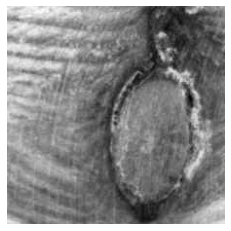

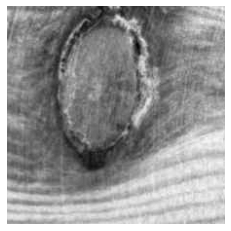

'Tue Mar 22 22:08:03 2022'

In [3]:
# train set preperation(patial live knot)
p1 = mpimg.imread('E:\工作\manuscript-2021.11.24\Multimedia Tools and Applications\待测图像2\wood_image23.jpg') / 255
# 32 dead knot; 23 patial live knot; 18 branch knot; 3 live knot
r = 224
m = 650
n = 820
t = np.zeros([100, r, r, 1], dtype = np.float32)
k = 0
for i in range(10):
    x = m + 6 * i
    for j in range(10):
        y = n + 6 * j
        t[k, :, :, 0] = p1[x:x + r, y:y + r]
        k = k + 1
x_train2 = t
print('x_train2:', t.shape)
plt.imshow(t[0, :, :, 0], cmap = 'gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
plt.imshow(t[99, :, :, 0], cmap = 'gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
time.asctime()

x_train3: (100, 224, 224, 1)


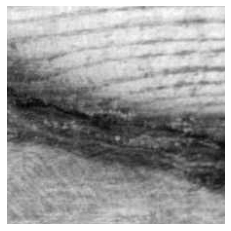

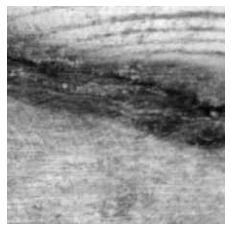

'Tue Mar 22 22:08:08 2022'

In [4]:
# train set preperation(branch knot)
p1 = mpimg.imread('E:\工作\manuscript-2021.11.24\Multimedia Tools and Applications\待测图像2\wood_image18.jpg') / 255
# 32 dead knot; 23 patial live knot; 18 branch knot; 3 live knot
r = 224
m = 250
n = 1700
t = np.zeros([100, r, r, 1], dtype = np.float32)
k = 0
for i in range(10):
    x = m + 6 * i
    for j in range(10):
        y = n + 6 * j
        t[k, :, :, 0] = p1[x:x + r, y:y + r]
        k = k + 1
x_train3 = t
print('x_train3:', t.shape)
plt.imshow(t[0, :, :, 0], cmap = 'gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
plt.imshow(t[99, :, :, 0], cmap = 'gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
time.asctime()

x_train4: (100, 224, 224, 1)


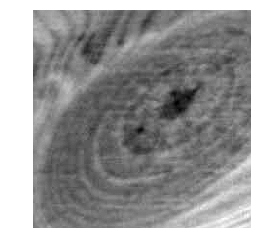

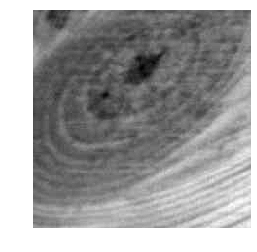

'Thu Mar 24 14:40:24 2022'

In [5]:
# train set preperation(live knot)
p1 = mpimg.imread('E:\文件管理\木材工业研究所\manuscript-2020.05.27\待测图像2\wood_image3.jpg') / 255
# 32 dead knot; 23 patial live knot; 18 branch knot; 3 live knot
r = 224
m = 250
n = 260
t = np.zeros([100, r, r, 1], dtype = np.float32)
k = 0
for i in range(10):
    x = m + 4 * i
    for j in range(10):
        y = n + 4 * j
        t[k, :, :, 0] = p1[x:x + r, y:y + r]
        k = k + 1
x_train4 = t
print('x_train4:', t.shape)
plt.imshow(t[0, :, :, 0], cmap = 'gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
plt.imshow(t[99, :, :, 0], cmap = 'gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
time.asctime()

x_train5: (400, 224, 224, 1)


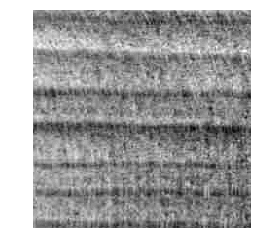

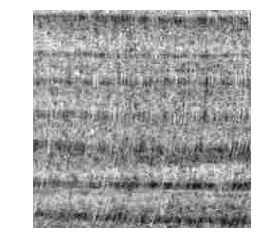

'Thu Mar 24 14:40:48 2022'

In [6]:
# train set preperation(defects free)
p1 = mpimg.imread('E:\文件管理\木材工业研究所\manuscript-2020.05.27\待测图像2\wood_image32.jpg') / 255
# 32 dead knot; 23 patial live knot; 18 branch knot; 3 live knot
r = 224
m = 650
n = 820
t = np.zeros([400, r, r, 1], dtype = np.float32)
k = 0
for i in range(20):
    x = m + 6 * i
    for j in range(20):
        y = n + 6 * j
        t[k, :, :, 0] = p1[x:x + r, y:y + r]
        k = k + 1
x_train5 = t
print('x_train5:', t.shape)
plt.imshow(t[0, :, :, 0], cmap = 'gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
plt.imshow(t[399, :, :, 0], cmap = 'gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
time.asctime()

x_test1: (100, 224, 224, 1)


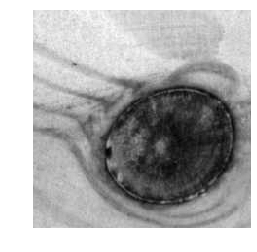

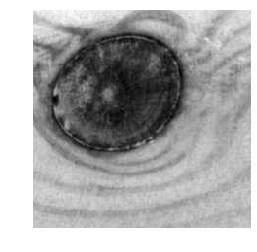

'Fri Apr  8 17:54:28 2022'

In [3]:
# test set preperation(dead knot)
p1 = mpimg.imread('E:\文件管理\木材工业研究所\manuscript-2020.05.27\待测图像2\wood_image31.jpg') / 255 
# 31 dead knot; 23 patial live knot; 18 branch knot; 3 live knot
r = 224
m = 640
n = 1330
t = np.zeros([100, r, r, 1], dtype = np.float32)
k = 0
for i in range(10):
    x = m + 6 * i
    for j in range(10):
        y = n + 6 * j
        t[k, :, :, 0] = p1[x:x + r, y:y + r]
        k = k + 1
x_test1 = t
print('x_test1:', t.shape)
plt.imshow(t[0, :, :, 0], cmap = 'gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
plt.imshow(t[99, :, :, 0], cmap = 'gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
time.asctime()

In [11]:
# image saving
mpimg.imsave('f4.jpg', t[59, :, :, 0], cmap = 'Greys_r')

x_test2: (100, 224, 224, 1)


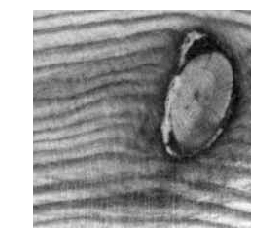

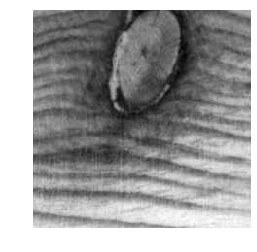

'Fri Apr  8 18:05:51 2022'

In [6]:
# test set preperation(patial live knot)
p1 = mpimg.imread('E:\文件管理\木材工业研究所\manuscript-2020.05.27\待测图像2\wood_image26.jpg') / 255 
# 31 dead knot; 26 patial live knot; 18 branch knot; 3 live knot
r = 224
m = 0
n = 1100
t = np.zeros([100, r, r, 1], dtype = np.float32)
k = 0
for i in range(10):
    x = m + 5 * i
    for j in range(10):
        y = n + 6 * j
        t[k, :, :, 0] = p1[x:x + r, y:y + r]
        k = k + 1
x_test2 = t
print('x_test2:', t.shape)
plt.imshow(t[0, :, :, 0], cmap = 'gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
plt.imshow(t[99, :, :, 0], cmap = 'gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
time.asctime()

x_test3: (100, 224, 224, 1)


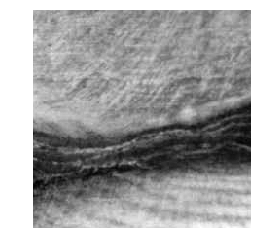

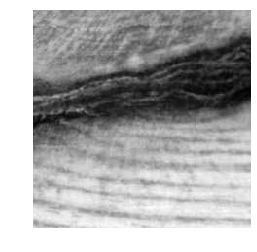

'Fri Apr  8 18:07:32 2022'

In [8]:
# test set preperation(branch knot)
p1 = mpimg.imread('E:\文件管理\木材工业研究所\manuscript-2020.05.27\待测图像2\wood_image19.jpg') / 255 
# 31 dead knot; 23 patial live knot; 19 branch knot; 4 live knot
r = 224
m = 420
n = 1700
t = np.zeros([100, r, r, 1], dtype = np.float32)
k = 0
for i in range(10):
    x = m + 6 * i
    for j in range(10):
        y = n + 6 * j
        t[k, :, :, 0] = p1[x:x + r, y:y + r]
        k = k + 1
x_test3 = t
print('x_test3:', t.shape)
plt.imshow(t[0, :, :, 0], cmap = 'gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
plt.imshow(t[99, :, :, 0], cmap = 'gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
time.asctime()

x_test4: (100, 224, 224, 1)


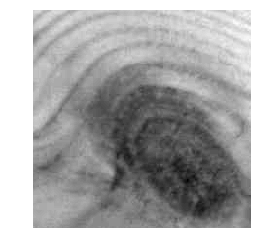

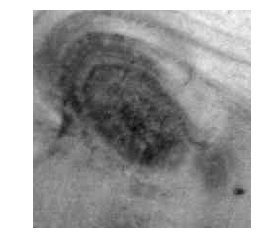

'Fri Apr  8 18:08:44 2022'

In [10]:
# test set preperation(live knot)
p1 = mpimg.imread('E:\文件管理\木材工业研究所\manuscript-2020.05.27\待测图像2\wood_image4.jpg') / 255 
# 31 dead knot; 21 patial live knot; 19 branch knot; 4 live knot
r = 224
m = 530
n = 370
t = np.zeros([100, r, r, 1], dtype = np.float32)
k = 0
for i in range(10):
    x = m + 6 * i
    for j in range(10):
        y = n + 6 * j
        t[k, :, :, 0] = p1[x:x + r, y:y + r]
        k = k + 1
x_test4 = t
print('x_test4:', t.shape)
plt.imshow(t[0, :, :, 0], cmap = 'gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
plt.imshow(t[99, :, :, 0], cmap = 'gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
time.asctime()

x_test5: (400, 224, 224, 1)


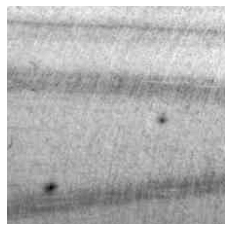

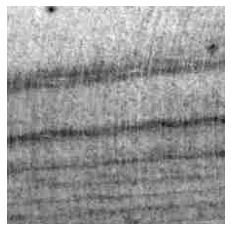

'Tue Mar 22 22:37:29 2022'

In [6]:
# train set preperation(defects free)
p1 = mpimg.imread('E:\工作\manuscript-2021.11.24\Multimedia Tools and Applications\待测图像2\wood_image4.jpg') / 255
# 32 dead knot; 23 patial live knot; 18 branch knot; 3 live knot
r = 224
m = 650
n = 820
t = np.zeros([400, r, r, 1], dtype = np.float32)
k = 0
for i in range(20):
    x = m + 6 * i
    for j in range(20):
        y = n + 6 * j
        t[k, :, :, 0] = p1[x:x + r, y:y + r]
        k = k + 1
x_test5 = t
print('x_test5:', t.shape)
plt.imshow(t[0, :, :, 0], cmap = 'gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
plt.imshow(t[399, :, :, 0], cmap = 'gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
time.asctime()

In [3]:
# sample set preperation(int to float, reshape to 4D tensor)
def ReLU(x):
    y = np.maximum(0, x)
    return y
def IoU_cmp(c1, c2):
    # c1, c2 are coordinates of two boxes
    a1 = ReLU(c2[1, 0] - c1[0, 0]) * ReLU(c2[1, 1] - c1[0, 1])
    a2 = ReLU(c1[1, 0] - c2[0, 0]) * ReLU(c1[1, 1] - c2[0, 1])
    a3 = ReLU(c1[1, 0] - c2[0, 0]) * ReLU(c2[1, 1] - c1[0, 1])
    a4 = ReLU(c2[1, 0] - c1[0, 0]) * ReLU(c1[1, 1] - c2[0, 1])
    a5 = ReLU(c1[1, 0] - c1[0, 0]) * ReLU(c1[1, 1] - c1[0, 1]) # area of c1
    a6 = ReLU(c2[1, 0] - c2[0, 0]) * ReLU(c2[1, 1] - c2[0, 1]) # area of c2
    a = np.array([a1, a2, a3, a4, a5, a6])
    y1 = a.min()
    y2 = a.max()
    y3 = y1 / y2
    return a1, a2, a3, a4, a5, a6, y3
x1 = np.array([[1, 2], [10, 28]])
x2 = np.array([[8, 22], [17, 41]])
print(x1)
print(x2)
print(IoU_cmp(x1, x2))
time.asctime()

[[ 1  2]
 [10 28]]
[[ 8 22]
 [17 41]]
(624, 12, 78, 96, 234, 171, 0.019230769230769232)


'Wed Nov 24 11:15:05 2021'

(800, 224, 224, 1)
(800, 1, 1, 5)
[[[[0. 0. 0. 1. 0.]]]


 [[[0. 0. 0. 1. 0.]]]


 [[[0. 0. 0. 1. 0.]]]


 [[[0. 0. 0. 1. 0.]]]


 [[[0. 0. 0. 1. 0.]]]


 [[[0. 0. 0. 0. 1.]]]


 [[[0. 0. 0. 0. 1.]]]


 [[[0. 0. 0. 0. 1.]]]


 [[[0. 0. 0. 0. 1.]]]


 [[[0. 0. 0. 0. 1.]]]]


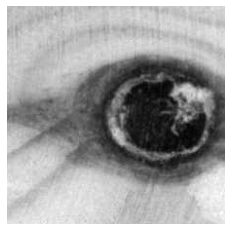

In [19]:
# train set preperation vgg
x_train = np.concatenate((x_train1, x_train2, x_train3, x_train4, x_train5), 0)
#x_train = np.concatenate((x_train_2, x_train_3), 0)
print(x_train.shape)
y_train = np.zeros([800, 1, 1, 5], dtype = np.float32)
y_train[0:100] = np.array([1, 0, 0, 0, 0])
y_train[100:200] = np.array([0, 1, 0, 0, 0])
y_train[200:300] = np.array([0, 0, 1, 0, 0])
y_train[300:400] = np.array([0, 0, 0, 1, 0])
y_train[400:800] = np.array([0, 0, 0, 0, 1])
print(y_train.shape)
print(y_train[395:405])
plt.imshow(x_train[1, :, :, 0], cmap = 'gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

(700, 224, 224, 1)
(700, 1, 1, 4)
[[[[0. 0. 1. 0.]]]


 [[[0. 0. 1. 0.]]]


 [[[0. 0. 1. 0.]]]


 [[[0. 0. 1. 0.]]]


 [[[0. 0. 1. 0.]]]


 [[[0. 0. 0. 1.]]]


 [[[0. 0. 0. 1.]]]


 [[[0. 0. 0. 1.]]]


 [[[0. 0. 0. 1.]]]


 [[[0. 0. 0. 1.]]]]


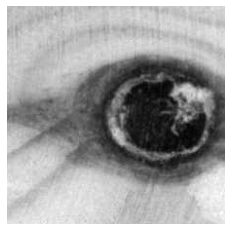

In [6]:
# train set preperation brank dark
x_train = np.concatenate((x_train1, x_train2, x_train3, x_train5), 0)
print(x_train.shape)
y_train = np.zeros([700, 1, 1, 4], dtype = np.float32)
y_train[0:100] = np.array([1, 0, 0, 0])
y_train[100:200] = np.array([0, 1, 0, 0])
y_train[200:300] = np.array([0, 0, 1, 0])
y_train[300:700] = np.array([0, 0, 0, 1])
print(y_train.shape)
print(y_train[295:305])
plt.imshow(x_train[1, :, :, 0], cmap = 'gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

(200, 224, 224, 1)
(200, 1, 1, 2)
[[[[1. 0.]]]


 [[[1. 0.]]]


 [[[1. 0.]]]


 [[[1. 0.]]]


 [[[1. 0.]]]


 [[[0. 1.]]]


 [[[0. 1.]]]


 [[[0. 1.]]]


 [[[0. 1.]]]


 [[[0. 1.]]]]


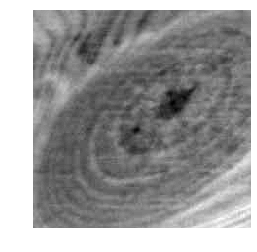

In [7]:
# train set preperation branch light
x_train = np.concatenate((x_train4, x_train5[0:100]), 0)
print(x_train.shape)
y_train = np.zeros([200, 1, 1, 2], dtype = np.float32)
y_train[0:100] = np.array([1, 0])
y_train[100:200] = np.array([0, 1])
print(y_train.shape)
print(y_train[95:105])
plt.imshow(x_train[1, :, :, 0], cmap = 'gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

(800, 224, 224, 1)
(800, 1, 1, 5)
[[[[0. 0. 0. 1. 0.]]]


 [[[0. 0. 0. 1. 0.]]]


 [[[0. 0. 0. 1. 0.]]]


 [[[0. 0. 0. 1. 0.]]]


 [[[0. 0. 0. 1. 0.]]]


 [[[0. 0. 0. 0. 1.]]]


 [[[0. 0. 0. 0. 1.]]]


 [[[0. 0. 0. 0. 1.]]]


 [[[0. 0. 0. 0. 1.]]]


 [[[0. 0. 0. 0. 1.]]]]


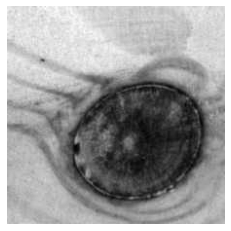

In [7]:
# test set preperation vgg
x_test = np.concatenate((x_test1, x_test2, x_test3, x_test4, x_test5), 0)
print(x_test.shape)
y_test = np.zeros([800, 1, 1, 5], dtype = np.float32)
y_test[0:100] = np.array([1, 0, 0, 0, 0])
y_test[100:200] = np.array([0, 1, 0, 0, 0])
y_test[200:300] = np.array([0, 0, 1, 0, 0])
y_test[300:400] = np.array([0, 0, 0, 1, 0])
y_test[400:800] = np.array([0, 0, 0, 0, 1])
print(y_test.shape)
print(y_test[395:405])
plt.imshow(x_test[1, :, :, 0], cmap = 'gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

(700, 224, 224, 1)
(700, 1, 1, 4)
[[[[0. 0. 1. 0.]]]


 [[[0. 0. 1. 0.]]]


 [[[0. 0. 1. 0.]]]


 [[[0. 0. 1. 0.]]]


 [[[0. 0. 1. 0.]]]


 [[[0. 0. 0. 1.]]]


 [[[0. 0. 0. 1.]]]


 [[[0. 0. 0. 1.]]]


 [[[0. 0. 0. 1.]]]


 [[[0. 0. 0. 1.]]]]


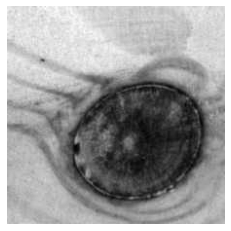

In [6]:
# test set preperation branch dark
x_test = np.concatenate((x_test1, x_test2, x_test3, x_test5), 0)
print(x_test.shape)
y_test = np.zeros([700, 1, 1, 4], dtype = np.float32)
y_test[0:100] = np.array([1, 0, 0, 0])
y_test[100:200] = np.array([0, 1, 0, 0])
y_test[200:300] = np.array([0, 0, 1, 0])
y_test[300:700] = np.array([0, 0, 0, 1])
print(y_test.shape)
print(y_test[295:305])
plt.imshow(x_test[1, :, :, 0], cmap = 'gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

(200, 224, 224, 1)
(200, 1, 1, 2)
[[[[1. 0.]]]


 [[[1. 0.]]]


 [[[1. 0.]]]


 [[[1. 0.]]]


 [[[1. 0.]]]


 [[[0. 1.]]]


 [[[0. 1.]]]


 [[[0. 1.]]]


 [[[0. 1.]]]


 [[[0. 1.]]]]


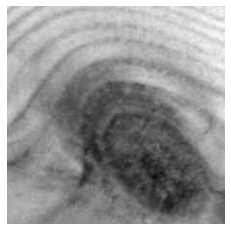

In [85]:
# test set preperation branch light
x_test = np.concatenate((x_test4, x_test5[0:100]), 0)
print(x_test.shape)
y_test = np.zeros([200, 1, 1, 2], dtype = np.float32)
y_test[0:100] = np.array([1, 0])
y_test[100:200] = np.array([0, 1])

print(y_test.shape)
print(y_test[95:105])
plt.imshow(x_test[1, :, :, 0], cmap = 'gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

In [8]:
# parameter computing(for train)
val = x_train.shape
mb_size = 20
X_dim = x_train.shape[3]
Y_dim = y_train.shape[3]
print('X_dim:', X_dim)
print('Y_dim:', Y_dim)
print(val)
print(y_train.shape)

X_dim: 1
Y_dim: 2
(200, 224, 224, 1)
(200, 1, 1, 2)


In [8]:
# parameter computing(for test)
val = x_test.shape
mb_size = 20
X_dim = x_test.shape[3]
Y_dim = y_test.shape[3]
print('X_dim:', X_dim)
print('Y_dim:', Y_dim)
print(val)
print(y_test.shape)

X_dim: 1
Y_dim: 5
(800, 224, 224, 1)
(800, 1, 1, 5)


In [28]:
############## kernel unit #############
# func: inception creation
def inception_unit(inls, outls, a1, a2, a3):
    # inls-number of input layers
    # outls-number of output layers
    out1 = int(outls * a1)
    out2 = int(outls * a2)
    out3 = int(outls * a3)
    out4 = outls - out1 -  out2 - out3
    v = [0 for i in range(8)] # initiate a list of 8 elements
    v[0] = tf.Variable(tf.truncated_normal((1, 1, inls, out1), stddev = 0.1), dtype = tf.float32, name = 'v0') # 1x1
    v[1] = tf.Variable(tf.truncated_normal((1, 1, inls, int(out2 / 2)), stddev = 0.1), dtype = tf.float32, name = 'v1') # 3x3
    v[2] = tf.Variable(tf.truncated_normal((3, 3, int(out2 / 2), out2), stddev = 0.1), dtype = tf.float32, name = 'v2')
    v[3] = tf.Variable(tf.truncated_normal((1, 1, inls, int(out3 / 2)), stddev = 0.1), dtype = tf.float32, name = 'v3') # 5x5
    v[4] = tf.Variable(tf.truncated_normal((5, 5, int(out3 / 2), out3), stddev = 0.1), dtype = tf.float32, name = 'v4')
    v[5] = tf.Variable(tf.truncated_normal((1, 1, inls, out4), stddev = 0.1), dtype = tf.float32, name = 'v5') # maxpool
    v[6] = tf.Variable(tf.constant(0.01, shape = [outls]), dtype = tf.float32, name = 'v6')
    v[7] = tf.Variable(tf.constant(0.01, shape = [outls]), dtype = tf.float32, name = 'v7')
    # data counting
    for i in range(len(v)):
        sh = v[i].shape
        for j in range(len(sh)):
            if j == 0:
                acm = sh[j]
            if j > 0:
                acm = sh[j] * acm
        if i == 0:
            ttl = acm
        if i > 0:
            ttl = ttl + acm
    print('inception unit data:', ttl)
    return v

# func: residual network unit creation(for generation network)
def residual_unit_G(inls, outls, win):
    # inls-number of input layers
    # outls-number of output layers
    v = [0 for i in range(15)] # initiate a list of 15 elements
    v[0] = tf.Variable(tf.truncated_normal((1, 1, int(outls / 4), inls), stddev = 0.1), dtype = tf.float32, name = 'v0')
    v[1] = tf.Variable(tf.constant(0.01, shape = [int(outls / 4)]), dtype = tf.float32, name = 'v1')
    v[2] = tf.Variable(tf.constant(0.01, shape = [int(outls / 4)]), dtype = tf.float32, name = 'v2')
    v[3] = tf.Variable(tf.truncated_normal((win, win, outls, int(outls / 4)), stddev = 0.1), dtype = tf.float32, name = 'v3')
    v[4] = tf.Variable(tf.constant(0.01, shape = [outls]), dtype = tf.float32, name = 'v4')
    v[5] = tf.Variable(tf.constant(0.01, shape = [outls]), dtype = tf.float32, name = 'v5')
    v[6] = tf.Variable(tf.truncated_normal((1, 1, int(outls / 4), outls), stddev = 0.1), dtype = tf.float32, name = 'v6')
    v[7] = tf.Variable(tf.constant(0.01, shape = [int(outls / 4)]), dtype = tf.float32, name = 'v7')
    v[8] = tf.Variable(tf.constant(0.01, shape = [int(outls / 4)]), dtype = tf.float32, name = 'v8')
    v[9] = tf.Variable(tf.truncated_normal((3, 3, int(outls / 4), int(outls / 4)), stddev = 0.1), dtype = tf.float32, name = 'v9')
    v[10] = tf.Variable(tf.constant(0.01, shape = [int(outls / 4)]), dtype = tf.float32, name = 'v10')
    v[11] = tf.Variable(tf.constant(0.01, shape = [int(outls / 4)]), dtype = tf.float32, name = 'v11')
    v[12] = tf.Variable(tf.truncated_normal((1, 1, outls, int(outls / 4)), stddev = 0.1), dtype = tf.float32, name = 'v12')
    v[13] = tf.Variable(tf.constant(0.01, shape = [outls]), dtype = tf.float32, name = 'v13')
    v[14] = tf.Variable(tf.constant(0.01, shape = [outls]), dtype = tf.float32, name = 'v14')
    # data counting
    for i in range(len(v)):
        sh = v[i].shape
        for j in range(len(sh)):
            if j == 0:
                acm = sh[j]
            if j > 0:
                acm = sh[j] * acm
        if i == 0:
            ttl = acm
        if i > 0:
            ttl = ttl + acm
    print('residual unit data:', ttl)
    return v
# func: convolutional layer creation
def convolutional_unit(inls, outls, win):
    # inls-number of input layers
    # outls-number of output layers
    v = [0 for i in range(3)] # initiate a list of 3 elements
    v[0] = tf.Variable(tf.truncated_normal((win, win, inls, outls), stddev = 0.1), dtype = tf.float32, name = 'v0')
    v[1] = tf.Variable(tf.constant(0.01, shape = [outls]), dtype = tf.float32, name = 'v1')
    v[2] = tf.Variable(tf.constant(0.01, shape = [outls]), dtype = tf.float32, name = 'v2')
    # data counting
    for i in range(len(v)):
        sh = v[i].shape
        for j in range(len(sh)):
            if j == 0:
                acm = sh[j]
            if j > 0:
                acm = sh[j] * acm
        if i == 0:
            ttl = acm
        if i > 0:
            ttl = ttl + acm
    print('convolutional unit data:', ttl)
    return v
def convolutional_single(inls, outls, win):
    # inls-number of input layers
    # outls-number of output layers
    v = [0 for i in range(1)] # initiate a list of 3 elements
    v[0] = tf.Variable(tf.truncated_normal((win, win, inls, outls), stddev = 0.1), dtype = tf.float32, name = 'v0')
    # data counting
    for i in range(len(v)):
        sh = v[i].shape
        for j in range(len(sh)):
            if j == 0:
                acm = int(sh[j])
            if j > 0:
                acm = int(sh[j]) * acm
        if i == 0:
            ttl = acm
        if i > 0:
            ttl = ttl + acm
    print('convolutional unit data:', ttl, type(acm))
    cb1 = (win ** 2 * inls) * outls
    print('computation burden(D):', cb1, type(cb1))
    return v, ttl, cb1

In [30]:
##### Variables create ########
## VGG11 ##
X = tf.placeholder(tf.float32, shape = [None, val[1], val[2], X_dim], name = 'X')
print(X)
y = tf.placeholder(tf.float32, shape = [None, 1, 1, Y_dim], name = 'y') # 正向分类
print(y)
keep_prob = tf.placeholder(tf.float32, name = 'keep_prob')
print(keep_prob)
c1 = 3
c2 = 7
deep1 = 16
deep2 = int(deep1 * 2)
deep3 = int(deep2 * 2)
deep4 = int(deep3 * 2)
deep5 = int(deep4 * 2)
deep6 = int(deep5 * 2)
eps = 1e-7
print('deep1', deep1)
print('deep4', deep4)

lp = np.zeros([1, 11])
cp = np.zeros([1, 11])
## network construction ##
## Discriminator ##
print('Discriminator layer 1:')
t = convolutional_single(X_dim, deep1, c1) # 112
D1 = t[0]
lp[0, 0] = t[1]
cp[0, 0] = t[2]
print(len(D1))
print('Discriminator layer 2:')
t = convolutional_single(deep1, deep2, c1) # 56
D2 = t[0]
lp[0, 1] = t[1]
cp[0, 1] = t[2]
print(len(D2))
print('Discriminator layer 3:')
t = convolutional_single(deep2, deep3, c1) # 28
D31 = t[0]
lp[0, 2] = t[1]
cp[0, 2] = t[2]
print(len(D31))
t = convolutional_single(deep2, deep3, c1) # 28
D32 = t[0]
lp[0, 3] = t[1]
cp[0, 3] = t[2]
print(len(D32))
print('Discriminator layer 4:')
t = convolutional_single(deep3, deep4, c1) # 14
D41 = t[0]
lp[0, 4] = t[1]
cp[0, 4] = t[2]
print(len(D41))
t = convolutional_single(deep3, deep4, c1) # 14
D42 = t[0]
lp[0, 5] = t[1]
cp[0, 5] = t[2]
print(len(D42))
print('Discriminator layer 5:')
t = convolutional_single(deep4, deep4, c1) # 7
D51 = t[0]
lp[0, 6] = t[1]
cp[0, 6] = t[2]
print(len(D51))
t = convolutional_single(deep4, deep4, c1) # 7
D52 = t[0]
lp[0, 7] = t[1]
cp[0, 7] = t[2]
print(len(D52))
print('Discriminator layer 6:')
t = convolutional_single(deep4, deep4, 7) # 1
D6 = t[0]
lp[0, 8] = t[1]
cp[0, 8] = t[2]
print(len(D6))
print('Discriminator layer 7:')
t = convolutional_single(deep4, deep4, 1) # 1
D7 = t[0]
lp[0, 9] = t[1]
cp[0, 9] = t[2]
print(len(D7))
print('Discriminator layer 8:')
t = convolutional_single(deep4, Y_dim, 1) # 1
D8 = t[0]
lp[0, 10] = t[1]
cp[0, 10] = t[2]
print(len(D8))

update = D1 + D2 + D31 + D32 + D41 + D42 + D51 + D52 + D6 + D7 + D8
print('total varibles:', len(update))
print('total parameters:', np.sum(lp))
print('total computation load:', np.sum(cp))
print('val', val)
time.asctime()

Tensor("X_11:0", shape=(?, 224, 224, 1), dtype=float32)
Tensor("y_11:0", shape=(?, 1, 1, 2), dtype=float32)
Tensor("keep_prob_11:0", dtype=float32)
deep1 16
deep4 128
Discriminator layer 1:
convolutional unit data: 144 <class 'int'>
computation burden(D): 144 <class 'int'>
1
Discriminator layer 2:
convolutional unit data: 4608 <class 'int'>
computation burden(D): 4608 <class 'int'>
1
Discriminator layer 3:
convolutional unit data: 18432 <class 'int'>
computation burden(D): 18432 <class 'int'>
1
convolutional unit data: 18432 <class 'int'>
computation burden(D): 18432 <class 'int'>
1
Discriminator layer 4:
convolutional unit data: 73728 <class 'int'>
computation burden(D): 73728 <class 'int'>
1
convolutional unit data: 73728 <class 'int'>
computation burden(D): 73728 <class 'int'>
1
Discriminator layer 5:
convolutional unit data: 147456 <class 'int'>
computation burden(D): 147456 <class 'int'>
1
convolutional unit data: 147456 <class 'int'>
computation burden(D): 147456 <class 'int'>
1


'Thu Mar 24 14:50:49 2022'

In [41]:
##### Variables create ########
## new model ##
X = tf.placeholder(tf.float32, shape = [None, val[1], val[2], X_dim], name = 'X')
print(X)
y = tf.placeholder(tf.float32, shape = [None, 1, 1, Y_dim], name = 'y') # 正向分类
print(y)
keep_prob = tf.placeholder(tf.float32, name = 'keep_prob')
print(keep_prob)
c1 = 3
deep1 = 16
deep2 = int(deep1 * 2)
deep3 = int(deep2 * 2)
deep4 = int(deep3 * 2)
deep5 = int(deep4 * 2)
deep6 = int(deep5 * 2)
eps = 1e-7
print('deep1', deep1)
print('deep4', deep4)

lp = np.zeros([1, 7])
cp = np.zeros([1, 7])
## network construction ##
## Discriminator ##
print('Discriminator layer 1:')
t = convolutional_single(X_dim, deep1, c1) # 112
D1 = t[0]
lp[0, 0] = t[1]
cp[0, 0] = t[2]
print(len(D1))
print('Discriminator layer 2:')
t = convolutional_single(deep1, deep2, c1) # 56
D2 = t[0]
lp[0, 1] = t[1]
cp[0, 1] = t[2]
print(len(D2))
print('Discriminator layer 3:')
t = convolutional_single(deep2, deep3, c1) # 28
D3 = t[0]
lp[0, 2] = t[1]
cp[0, 2] = t[2]
print(len(D3))
print('Discriminator layer 4:')
t = convolutional_single(deep3, deep3, c1) # 14
D4 = t[0]
lp[0, 3] = t[1]
cp[0, 3] = t[2]
print(len(D4))
print('Discriminator layer 5:')
t = convolutional_single(deep3, deep3, 14) # 1
D5 = t[0]
lp[0, 4] = t[1]
cp[0, 4] = t[2]
print(len(D5))
print('Discriminator layer 6:')
t = convolutional_single(deep3, deep3, 1) # 1
D6 = t[0]
lp[0, 5] = t[1]
cp[0, 5] = t[2]
print(len(D6))
print('Discriminator layer 7:')
t = convolutional_single(deep3, 4, 1) # 1
D7 = t[0]
lp[0, 6] = t[1]
cp[0, 6] = t[2]
print(len(D7))

update = D1 + D2 + D3 + D4 + D5 + D6 + D7
print('total varibles:', len(update))
print('total parameters:', np.sum(lp))
print('total computation load:', np.sum(cp))
print('val', val)
time.asctime()

Tensor("X_13:0", shape=(?, 224, 224, 1), dtype=float32)
Tensor("y_13:0", shape=(?, 1, 1, 2), dtype=float32)
Tensor("keep_prob_13:0", dtype=float32)
deep1 16
deep4 128
Discriminator layer 1:
convolutional unit data: 144 <class 'int'>
computation burden(D): 144 <class 'int'>
1
Discriminator layer 2:
convolutional unit data: 4608 <class 'int'>
computation burden(D): 4608 <class 'int'>
1
Discriminator layer 3:
convolutional unit data: 18432 <class 'int'>
computation burden(D): 18432 <class 'int'>
1
Discriminator layer 4:
convolutional unit data: 36864 <class 'int'>
computation burden(D): 36864 <class 'int'>
1
Discriminator layer 5:
convolutional unit data: 802816 <class 'int'>
computation burden(D): 802816 <class 'int'>
1
Discriminator layer 6:
convolutional unit data: 4096 <class 'int'>
computation burden(D): 4096 <class 'int'>
1
Discriminator layer 7:
convolutional unit data: 256 <class 'int'>
computation burden(D): 256 <class 'int'>
1
total varibles: 7
total parameters: 867216.0
total c

'Thu Mar 24 15:12:49 2022'

In [42]:
m = 224
n = 224
a = m * n
#computation = cp[0,0] * a + cp[0,1] * a / 4 + cp[0,2] * a / 16 + cp[0,3] * a / 64 + cp[0,4] + cp[0,5] + cp[0,6]
computation1 = cp[0,0] * 1 + cp[0,1] * 1 / 4 + cp[0,2] * 1 / 16 + cp[0,3] * 1 / 64
computation2 = cp[0,4] * 0 + cp[0,5] + cp[0,6]
#computation = cp[0,0] * a + cp[0,1] * a / 4 + cp[0,2] * a / 16 + cp[0,3] * a / 16 + cp[0,4] * a / 64 + cp[0,5] * a / 64 + cp[0,6] * a / 256 + cp[0,7] * a / 256 + cp[0,8] * 0 + cp[0,9] + cp[0,10]
#computation1 = cp[0,0] * 1 + cp[0,1] * 1 / 4 + cp[0,2] * 1 / 16 + cp[0,3] * 1 / 16 + cp[0,4] * 1 / 64 + cp[0,5] * 1 / 64 + cp[0,6] * 1 / 256 + cp[0,7] * 1 / 256
#computation2 = cp[0,8] * 0 + cp[0,9] + cp[0,10]
print('computation1:', computation1 / np.power(10, 0))
print('computation2:', computation2 / np.power(10, 0))

computation1: 3024.0
computation2: 4352.0


In [50]:
print(D1)
print(D2)

[<tf.Variable 'v0_23:0' shape=(1, 1, 1, 7) dtype=float32>, <tf.Variable 'v1_21:0' shape=(1, 1, 1, 4) dtype=float32>, <tf.Variable 'v2_21:0' shape=(3, 3, 4, 9) dtype=float32>, <tf.Variable 'v3_15:0' shape=(1, 1, 1, 2) dtype=float32>, <tf.Variable 'v4_15:0' shape=(5, 5, 2, 5) dtype=float32>, <tf.Variable 'v5_14:0' shape=(1, 1, 1, 11) dtype=float32>, <tf.Variable 'v6_14:0' shape=(32,) dtype=float32>, <tf.Variable 'v7_14:0' shape=(32,) dtype=float32>]
[<tf.Variable 'v0_24:0' shape=(1, 1, 32, 18) dtype=float32>, <tf.Variable 'v1_22:0' shape=(1, 1, 32, 7) dtype=float32>, <tf.Variable 'v2_22:0' shape=(3, 3, 7, 15) dtype=float32>, <tf.Variable 'v3_16:0' shape=(1, 1, 32, 9) dtype=float32>, <tf.Variable 'v4_16:0' shape=(5, 5, 9, 18) dtype=float32>, <tf.Variable 'v5_15:0' shape=(1, 1, 32, 13) dtype=float32>, <tf.Variable 'v6_15:0' shape=(64,) dtype=float32>, <tf.Variable 'v7_15:0' shape=(64,) dtype=float32>]


In [22]:
# vgg 网络，这里是一个简单的神经网络，x是输入图片向量，y是相应的label
def inception(x, W, name_in):
    ## Branch: 1x1 ##
    y1 = tf.nn.conv2d(x, W[0], strides = [1, 1, 1, 1], padding = "SAME")
    ## Branch: 3x3 ##
    y = tf.nn.conv2d(x, W[1], strides = [1, 1, 1, 1], padding = "SAME")
    y3 = tf.nn.conv2d(y, W[2], strides = [1, 1, 1, 1], padding = "SAME")
    ## Branch: 5x5 ##
    y = tf.nn.conv2d(x, W[3], strides = [1, 1, 1, 1], padding = "SAME")
    y5 = tf.nn.conv2d(y, W[4], strides = [1, 1, 1, 1], padding = "SAME")
    ## Branch: maxpool ##
    y = tf.nn.max_pool(x, ksize = [1, 3, 3, 1], strides = [1, 1, 1, 1], padding = "SAME") # maxpool
    ymax = tf.nn.conv2d(y, W[5], strides = [1, 1, 1, 1], padding = "SAME")
    #print(y1.shape, y3.shape, y5.shape, ymax.shape)
    y = tf.concat((y1, y3, y5, ymax), 3, name_in)
    ## Activation ##
    m, v = tf.nn.moments(y, [0])
    sd = W[6] * (y - m) / tf.pow((v + eps), 0.5) + W[7]
    y = tf.nn.relu(sd, name_in)
    #print(d)
    return y

def convolution2D(x, W, pad, name_in):
    y = tf.nn.conv2d(x, W[0], strides = [1, 1, 1, 1], padding = pad)
    m, v = tf.nn.moments(y, [0])
    sd = W[1] * (y - m) / tf.pow((v + eps), 0.5) + W[2]
    d = tf.nn.relu(sd, name_in)
    return d, m, v

def discriminator(x):
    ## discriminator: 1 ##
    y = tf.nn.conv2d(x, D1[0], strides = [1, 1, 1, 1], padding = 'SAME', name = 'y')
    y = tf.nn.relu(y, 'y')
    d = tf.nn.max_pool(y, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID', name = 'd1') # pooling 112 x 112
    print(d)
    fig1 = y # 记录图像
    ## discriminator: 2 ##
    y = tf.nn.conv2d(d, D2[0], strides = [1, 1, 1, 1], padding = 'SAME', name = 'y')
    y = tf.nn.relu(y, 'y')
    d = tf.nn.max_pool(y, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID', name = 'd2') # pooling 56 x 56
    print(d)
    fig2 = y # 记录图像
    ## discriminator: 3 ##
    y = tf.nn.conv2d(d, D31[0], strides = [1, 1, 1, 1], padding = 'SAME', name = 'y')
    y = tf.nn.conv2d(y, D32[0], strides = [1, 1, 1, 1], padding = 'SAME', name = 'y')
    y = tf.nn.relu(y, 'y')
    d = tf.nn.max_pool(y, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID', name = 'd3') # pooling 28 x 28
    print(d)
    fig3 = y # 记录图像
    ## discriminator: 4 ##
    y = tf.nn.conv2d(d, D41[0], strides = [1, 1, 1, 1], padding = 'SAME', name = 'y')
    y = tf.nn.conv2d(y, D42[0], strides = [1, 1, 1, 1], padding = 'SAME', name = 'y')
    y = tf.nn.relu(y, 'y')
    d = tf.nn.max_pool(y, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID', name = 'd4') # pooling 14 x 14
    print(d)
    ## discriminator: 5 ##
    y = tf.nn.conv2d(d, D51[0], strides = [1, 1, 1, 1], padding = 'SAME', name = 'y')
    y = tf.nn.conv2d(y, D52[0], strides = [1, 1, 1, 1], padding = 'SAME', name = 'y')
    y = tf.nn.relu(y, 'y')
    d = tf.nn.max_pool(y, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID', name = 'd5') # pooling 7 x 7
    print(d)
    ## discriminator: 6 ##
    d = tf.nn.conv2d(d, D6[0], strides = [1, 1, 1, 1], padding = 'VALID', name = 'd6')
    print(d)
    ## discriminator: 7 ##
    d = tf.nn.conv2d(d, D7[0], strides = [1, 1, 1, 1], padding = 'VALID', name = 'd7')
    print(d)
    ## discriminator: 8 ##
    d = tf.nn.conv2d(d, D8[0], strides = [1, 1, 1, 1], padding = 'VALID', name = 'd8')
    print(d)
    prediction = tf.nn.softmax(d, name = 'prediction') # 判别结果
    print(prediction)
    return prediction, fig1, fig2, fig3

#噪声产生的函数
def sample_Z(m, n):
    return np.random.uniform(-1., 1., size = [m, 1, 1, n])

def rand_array(Lv, Hv, num):
    sample = np.arange(Lv, Hv + 1, 1) #生成Lv到Hv的等差数列(Hv - Lv个数)
    output = np.random.rand(1, num)   #初始化输出数列
    for i in range(num):
        #print(i)
        val = np.random.rand(1) * (Hv - Lv + 1 - i)
        ind = int(np.floor(val))
        #print(val, ind, sample[ind])
        output[0, i] = sample[ind] #赋值
        sample = np.delete(sample, ind) #删除当前序号中的值
    return output
# 函数：rearrange
def array_assign(x, index): # 以index为依据重新分配x的元素
    y = np.zeros(x.shape, dtype = np.float32)
    for i in range(x.shape[0]):
        n = int(index[0, i])
        y[i, :] = x[n, :]
    return y

In [13]:
# new model 网络
def inception(x, W, name_in):
    ## Branch: 1x1 ##
    y1 = tf.nn.conv2d(x, W[0], strides = [1, 1, 1, 1], padding = "SAME")
    ## Branch: 3x3 ##
    y = tf.nn.conv2d(x, W[1], strides = [1, 1, 1, 1], padding = "SAME")
    y3 = tf.nn.conv2d(y, W[2], strides = [1, 1, 1, 1], padding = "SAME")
    ## Branch: 5x5 ##
    y = tf.nn.conv2d(x, W[3], strides = [1, 1, 1, 1], padding = "SAME")
    y5 = tf.nn.conv2d(y, W[4], strides = [1, 1, 1, 1], padding = "SAME")
    ## Branch: maxpool ##
    y = tf.nn.max_pool(x, ksize = [1, 3, 3, 1], strides = [1, 1, 1, 1], padding = "SAME") # maxpool
    ymax = tf.nn.conv2d(y, W[5], strides = [1, 1, 1, 1], padding = "SAME")
    #print(y1.shape, y3.shape, y5.shape, ymax.shape)
    y = tf.concat((y1, y3, y5, ymax), 3, name_in)
    ## Activation ##
    m, v = tf.nn.moments(y, [0])
    sd = W[6] * (y - m) / tf.pow((v + eps), 0.5) + W[7]
    y = tf.nn.relu(sd, name_in)
    #print(d)
    return y

def convolution2D(x, W, pad, name_in):
    y = tf.nn.conv2d(x, W[0], strides = [1, 1, 1, 1], padding = pad)
    m, v = tf.nn.moments(y, [0])
    sd = W[1] * (y - m) / tf.pow((v + eps), 0.5) + W[2]
    d = tf.nn.relu(sd, name_in)
    return d, m, v

def discriminator(x):
    ## discriminator: 1 ##
    y = tf.nn.conv2d(x, D1[0], strides = [1, 1, 1, 1], padding = 'SAME', name = 'y')
    y = tf.nn.relu(y, 'y')
    d = tf.nn.max_pool(y, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID', name = 'd1') # pooling 112 x 112
    print(d)
    fig1 = y # 记录图像
    ## discriminator: 2 ##
    y = tf.nn.conv2d(d, D2[0], strides = [1, 1, 1, 1], padding = 'SAME', name = 'y')
    y = tf.nn.relu(y, 'y')
    d = tf.nn.max_pool(y, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID', name = 'd2') # pooling 56 x 56
    print(d)
    fig2 = y # 记录图像
    ## discriminator: 3 ##
    y = tf.nn.conv2d(d, D3[0], strides = [1, 1, 1, 1], padding = 'SAME', name = 'y')
    y = tf.nn.relu(y, 'y')
    d = tf.nn.max_pool(y, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID', name = 'd3') # pooling 28 x 28
    print(d)
    fig3 = y # 记录图像
    ## discriminator: 4 ##
    y = tf.nn.conv2d(d, D4[0], strides = [1, 1, 1, 1], padding = 'SAME', name = 'y')
    y = tf.nn.relu(y, 'y')
    d = tf.nn.max_pool(y, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID', name = 'd4') # pooling 14 x 14
    print(d)
    ## discriminator: 5 ##
    d = tf.nn.conv2d(d, D5[0], strides = [1, 14, 14, 1], padding = 'VALID', name = 'y')
    #d = tf.nn.max_pool(d, ksize = [1, 14, 14, 1], strides = [1, 1, 1, 1], padding = 'VALID', name = 'y') # pooling 14 x 14
    print(d)
    ## discriminator: 6 ##
    d = tf.nn.conv2d(d, D6[0], strides = [1, 1, 1, 1], padding = 'VALID', name = 'y')
    print(d)
    ## discriminator: 7 ##
    d = tf.nn.conv2d(d, D7[0], strides = [1, 1, 1, 1], padding = 'VALID', name = 'y')
    print(d)
    prediction = tf.nn.softmax(d, name = 'prediction') # 判别结果
    print(prediction)
    return prediction, fig1, fig2, fig3

#噪声产生的函数
def sample_Z(m, n):
    return np.random.uniform(-1., 1., size = [m, 1, 1, n])

def rand_array(Lv, Hv, num):
    sample = np.arange(Lv, Hv + 1, 1) #生成Lv到Hv的等差数列(Hv - Lv个数)
    output = np.random.rand(1, num)   #初始化输出数列
    for i in range(num):
        #print(i)
        val = np.random.rand(1) * (Hv - Lv + 1 - i)
        ind = int(np.floor(val))
        #print(val, ind, sample[ind])
        output[0, i] = sample[ind] #赋值
        sample = np.delete(sample, ind) #删除当前序号中的值
    return output
# 函数：rearrange
def array_assign(x, index): # 以index为依据重新分配x的元素
    y = np.zeros(x.shape, dtype = np.float32)
    for i in range(x.shape[0]):
        n = int(index[0, i])
        y[i, :] = x[n, :]
    return y

In [23]:
## 初始化 ##
D_pre, p1, p2, p3 = discriminator(X)
print('D_pre:', D_pre)
print('X:', X)
print('y:', y)

#discriminator
D_loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(D_pre), reduction_indices = [3]), name = 'D_loss') #D_loss 判断的损失
print(D_loss)

#D_solver = tf.train.AdamOptimizer(1e-4).minimize(D_loss, var_list = update)
D_solver = tf.train.GradientDescentOptimizer(1e-3).minimize(D_loss, var_list = update)
sess = tf.Session()
#sess.run(tf.initialize_all_variables())
sess.run(tf.global_variables_initializer())
N = 0 # for counting
cnt = 0
print('\033[5;31;47m%s\033[0m '% 'Ready for training!')

Tensor("d1_2:0", shape=(None, 112, 112, 16), dtype=float32)
Tensor("d2_2:0", shape=(None, 56, 56, 32), dtype=float32)
Tensor("d3_1:0", shape=(None, 28, 28, 64), dtype=float32)
Tensor("d4_1:0", shape=(None, 14, 14, 128), dtype=float32)
Tensor("d5:0", shape=(None, 7, 7, 128), dtype=float32)
Tensor("d6:0", shape=(None, 1, 1, 128), dtype=float32)
Tensor("d7:0", shape=(None, 1, 1, 128), dtype=float32)
Tensor("d8:0", shape=(None, 1, 1, 5), dtype=float32)
Tensor("prediction_1:0", shape=(None, 1, 1, 5), dtype=float32)
D_pre: Tensor("prediction_1:0", shape=(None, 1, 1, 5), dtype=float32)
X: Tensor("X_2:0", shape=(None, 224, 224, 1), dtype=float32)
y: Tensor("y_17:0", shape=(None, 1, 1, 5), dtype=float32)
Tensor("D_loss_1:0", shape=(), dtype=float32)
Ready for training! 


In [24]:
val = x_train.shape
arr = rand_array(0, val[0] - 1, val[0]) # 生成随机数
x_all = array_assign(x_train, arr)
y_all = array_assign(y_train, arr)
print(arr[0, 0:10])
print('x shape', x_all.shape, 'y shape', y_all.shape, 'mb_size', mb_size)
N = 0 # for counting
cnt = 0
print('\033[1;31;46m%s\033[0m '% 'Ready for training!')
time.asctime()

[502.  40. 271. 505. 299.  54.  32. 308. 133. 652.]
x shape (800, 224, 224, 1) y shape (800, 1, 1, 5) mb_size 20
Ready for training! 


'Tue Mar 22 22:19:31 2022'

In [9]:
# load model(parameter)
par = np.load('model_vgg.npy', allow_pickle = True)
#m_overall = np.load('m_light.npy', allow_pickle = True)
#v_overall = np.load('v_light.npy', allow_pickle = True)
print(len(par))
#print(len(m_overall))
#print(len(v_overall))
print(par[0])

X = tf.placeholder(tf.float32, shape = [None, val[1], val[2], X_dim], name = 'X')
print(X)
y = tf.placeholder(tf.float32, shape = [None, 1, 1, Y_dim], name = 'y') # 正向分类
print(y)
eps = 1e-7

11
[[[[-0.00614549  0.11888987  0.00257898 -0.06964087 -0.14082034
    -0.05863389 -0.09816465 -0.00652451  0.04106883 -0.08108402
     0.04817365  0.11397749  0.05468931  0.01054589 -0.06465377
    -0.09533202]]

  [[-0.0298163  -0.13257544 -0.09243114 -0.0624154  -0.0242786
    -0.01092086 -0.0805679  -0.10106217 -0.02489141 -0.09942093
     0.11189853  0.00549994 -0.06610157  0.04274904 -0.1635648
    -0.15878233]]

  [[-0.00925183 -0.10175071 -0.02114344  0.11957225 -0.0307687
    -0.01590756 -0.0640998   0.13172609 -0.21801963 -0.14633459
     0.08662777  0.07198787  0.09021534 -0.17833592  0.00710087
    -0.05782985]]]


 [[[-0.02909042 -0.13011937  0.05111282 -0.01983498  0.12192592
    -0.0705788  -0.02045498  0.11267626  0.14682043  0.0572544
    -0.13169004  0.0205329   0.09553297 -0.15908591  0.0346894
    -0.02361979]]

  [[-0.09033187 -0.16784154  0.09124624 -0.11910325 -0.05078102
     0.07760277 -0.0348913  -0.05112718 -0.10731866 -0.05352207
    -0.0289531  -0.03584482 

No.  10
Iter: 10
size: 20
Interval: 180 200
D_loss: 1.372
Time used: 4.968297100000029
No.  20
Iter: 20
size: 20
Interval: 380 400
D_loss: 1.385
Time used: 1.8176900000000273
No.  30
Iter: 30
size: 20
Interval: 580 600
D_loss: 1.248
Time used: 1.770452500000033
No.  40
Iter: 40
size: 20
Interval: 780 800
D_loss: 0.9809
Time used: 1.6439060000000154
No.  50
Iter: 50
size: 20
Interval: 180 200
D_loss: 1.041
Time used: 1.6227157999999804
No.  60
Iter: 60
size: 20
Interval: 380 400
D_loss: 1.143
Time used: 1.5726751000000263
No.  70
Iter: 70
size: 20
Interval: 580 600
D_loss: 1.748
Time used: 1.5723518000000354
No.  80
Iter: 80
size: 20
Interval: 780 800
D_loss: 0.6065
Time used: 1.5796703999999977
No.  90
Iter: 90
size: 20
Interval: 180 200
D_loss: 1.063
Time used: 1.57513670000003
No.  100
Iter: 100
size: 20
Interval: 380 400
D_loss: 0.6068
Time used: 1.5758629000000042
No.  110
Iter: 110
size: 20
Interval: 580 600
D_loss: 0.777
Time used: 1.576878699999952
No.  120
Iter: 120
size: 20
In

No.  910
Iter: 910
size: 20
Interval: 580 600
D_loss: 0.002633
Time used: 1.5818942000000789
No.  920
Iter: 920
size: 20
Interval: 780 800
D_loss: 0.001935
Time used: 1.5897835999999188
No.  930
Iter: 930
size: 20
Interval: 180 200
D_loss: 0.001144
Time used: 1.5861965999999939
No.  940
Iter: 940
size: 20
Interval: 380 400
D_loss: 0.003092
Time used: 1.5878638000000365
No.  950
Iter: 950
size: 20
Interval: 580 600
D_loss: 0.002362
Time used: 1.628587400000015
No.  960
Iter: 960
size: 20
Interval: 780 800
D_loss: 0.001618
Time used: 1.6535339999999223
No.  970
Iter: 970
size: 20
Interval: 180 200
D_loss: 0.001037
Time used: 1.625773400000071
No.  980
Iter: 980
size: 20
Interval: 380 400
D_loss: 0.002734
Time used: 1.5781140000000278
No.  990
Iter: 990
size: 20
Interval: 580 600
D_loss: 0.002165
Time used: 1.591482400000018
No.  1000
Iter: 1000
size: 20
Interval: 780 800
D_loss: 0.001364
Time used: 1.5841369000000896
No.  1010
Iter: 1010
size: 20
Interval: 180 200
D_loss: 0.0009447
Time 

No.  1780
Iter: 1780
size: 20
Interval: 380 400
D_loss: 0.0006526
Time used: 1.576110700000072
No.  1790
Iter: 1790
size: 20
Interval: 580 600
D_loss: 0.0008086
Time used: 1.6196168999999827
No.  1800
Iter: 1800
size: 20
Interval: 780 800
D_loss: 0.0002938
Time used: 1.618034200000011
No.  1810
Iter: 1810
size: 20
Interval: 180 200
D_loss: 0.0003325
Time used: 1.6059440999999879
No.  1820
Iter: 1820
size: 20
Interval: 380 400
D_loss: 0.0006272
Time used: 1.5808415999999852
No.  1830
Iter: 1830
size: 20
Interval: 580 600
D_loss: 0.0007797
Time used: 1.5759932999999364
No.  1840
Iter: 1840
size: 20
Interval: 780 800
D_loss: 0.0002814
Time used: 1.5869258000000173
No.  1850
Iter: 1850
size: 20
Interval: 180 200
D_loss: 0.0003206
Time used: 1.5786722000000282
No.  1860
Iter: 1860
size: 20
Interval: 380 400
D_loss: 0.0006026
Time used: 1.590734399999974
No.  1870
Iter: 1870
size: 20
Interval: 580 600
D_loss: 0.0007529
Time used: 1.5897710000000416
No.  1880
Iter: 1880
size: 20
Interval: 780

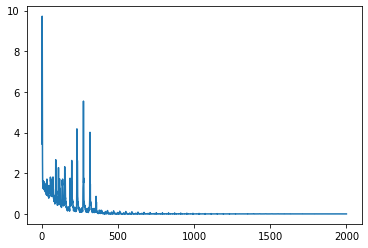

'Tue Mar 22 22:25:35 2022'

In [25]:
# training
s0 = time.clock()
s1 = time.clock()
for it in range(2000):
    m1 = (N * mb_size) % (val[0])
    m2 = np.min([m1 + mb_size, val[0]])
    a1 = np.arange(m1, m2)
    m3 = 0
    m4 = np.max([m1 + mb_size - val[0], 0])
    a2 = np.arange(m3, m4)
    b1 = a1.tolist()
    b2 = a2.tolist()
    t_idx = b1 + b2
    #print(len(t_idx), m1, m2, m3, m4)
    N = N + 1
    X_mb = x_all[t_idx]
    y_mb = y_all[t_idx]
    result1 = sess.run([D_solver, D_loss, D_pre], feed_dict = {X: X_mb, y:y_mb}) # discriminator训练
    # residual record
    if N == 1:
        r_w = np.array([result1[1]])
    if N > 1:
        r_w = np.concatenate((r_w, np.array([result1[1]])), 0)
    #输出训练时的参数
    if (it + 1) % 10 == 0:
        print('No. ', N)
        print('Iter: {}'.format(it + 1))
        print('size:', X_mb.shape[0])
        print('Interval:', m1, m2)
        print('D_loss: {:.4}'.format(result1[1]))
        #print('D_pre:', result1[2])
        s2 = time.clock()
        print("Time used:", s2 - s1)
        s1 = time.clock()
    #axis_y = result1[10][1, :, :, 0:30] # u的柱状图
    #print(axis_y.shape)
    #axis_y = axis_y.reshape(30)
    #axis_x = np.arange(30)
    #print(axis_x.shape, axis_y.shape)
    #plt.bar(axis_x, axis_y, align = 'center')
    #plt.axis('on') # 不显示坐标轴
s3 = time.clock()
if cnt == 0:
    ttm = (s3 - s0) / 60
if cnt > 0:
    ttm = ttm + (s3 - s0) / 60
print('Time used(min):', (s3 - s0) / 60)
print('Total time(min):', ttm)
cnt = cnt + 1

rs = r_w.shape
print('r_w:', rs)
# ploting
axis_x = np.arange(1, rs[0] + 1, 1)
axis_y = r_w
plt.plot(axis_x, axis_y)
x_major_locator = MultipleLocator(500)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
#plt.xticks(axis_x) #
plt.show()
time.asctime()

In [26]:
np.save('res_vgg.npy', r_w)

(200,)
(200,)


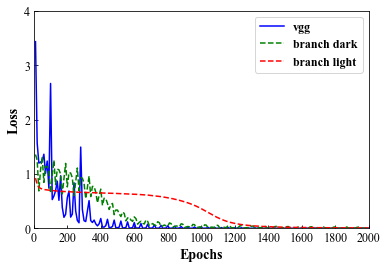

In [29]:
# results display
axis_x = np.arange(1, 200 + 1, 1)
b = np.arange(0, 2000, 10) # 从0开始间隔为10的等差数列
aa = np.load('res_vgg.npy')
axis_y1 = aa[b]
print(axis_y1.shape)
print(axis_x.shape)
aa = np.load('res_dark.npy')
axis_y2 = aa[b]
aa = np.load('res_light.npy')
axis_y3 = aa[b]

#print(axis_x.shape, axis_y.shape)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(axis_x * 10, axis_y1, c = 'blue', linestyle = '-', label = 'vgg')
plt.plot(axis_x * 10, axis_y2, c = 'green', linestyle = '--', label = 'branch dark')
plt.plot(axis_x * 10, axis_y3, c = 'red', linestyle = '--', label = 'branch light')
#plt.plot(axis_x * 20, axis_y4, c = 'c', linestyle = '--', label = 'residual_self_branch_4')
#plt.plot(axis_x * 20, axis_y5, c = 'm', linestyle = ':', label = 'Self-adapt-inception')
#plt.plot(axis_x * 10, axis_y4, c = 'blue', linestyle = ':', marker = '.', label = 'Self-adapt-3x3')

font = {'family':'Times New Roman', 'weight':'bold', 'style':'normal', 'size':12}
Lg = plt.legend(prop = font) # display lengend
font = {'family':'Times New Roman', 'weight':'bold', 'size':'larger', 'color':'black'}
plt.xlabel('Epochs', fontsize = 14, fontdict = font)
plt.ylabel('Loss', fontsize = 14, fontdict = font)
x_major_locator = MultipleLocator(200) # x axis interval setting
y_major_locator = MultipleLocator(1) # y axis interval setting
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xticks(fontproperties = 'Times New Roman', size = 12)
plt.yticks(fontproperties = 'Times New Roman', size = 12)
plt.ylim(0, 4)
plt.xlim(0, 2000)
#y_values=list(range(11))

plt.savefig('Loss_plot.jpg', bbox_inches = 'tight')
plt.show()

In [83]:
# model saving
model_light = sess.run(update)
print(len(model_light))
print(model_light[0].shape)
print(model_light[0])
np.save('model_light', model_light, allow_pickle = True)

7
(3, 3, 1, 16)
[[[[ 0.13  0.01 -0.11  0.05 -0.13  0.17  0.02  0.02 -0.05 -0.09  0.07
     0.18  0.03  0.15  0.06 -0.02]]

  [[ 0.18 -0.17 -0.14 -0.1  -0.02 -0.02 -0.06  0.11 -0.01 -0.05 -0.07
    -0.1  -0.02  0.12  0.16  0.03]]

  [[ 0.04 -0.07 -0.03 -0.01  0.03  0.09  0.04 -0.04  0.05 -0.17  0.19
     0.07  0.12 -0.14  0.04  0.12]]]


 [[[ 0.23  0.03 -0.01 -0.01 -0.05 -0.11 -0.14 -0.16  0.01 -0.   -0.12
     0.26 -0.04 -0.07 -0.03  0.09]]

  [[ 0.02  0.04 -0.03 -0.14  0.18 -0.01  0.06 -0.04  0.15 -0.07 -0.05
     0.03 -0.14 -0.07 -0.01  0.09]]

  [[ 0.22 -0.02 -0.05  0.08  0.13 -0.   -0.16 -0.07 -0.13 -0.15 -0.02
     0.26 -0.16 -0.04  0.01 -0.02]]]


 [[[ 0.1  -0.01 -0.07 -0.06 -0.09  0.05 -0.14  0.12 -0.1  -0.05  0.15
    -0.04  0.1  -0.08 -0.1  -0.18]]

  [[ 0.2  -0.01 -0.06 -0.11 -0.1   0.01 -0.11  0.13 -0.11  0.04 -0.05
     0.17 -0.07  0.08 -0.05  0.02]]

  [[ 0.31 -0.04 -0.02  0.03 -0.07 -0.03 -0.05 -0.13  0.19  0.03 -0.02
     0.05 -0.17 -0.17 -0.    0.03]]]]


D:\program\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [44]:
# mean and variance computation
s0 = time.clock()
s1 = time.clock()
m_overall = [0 for i in range(9)]
v_overall = [0 for i in range(9)]
n_b = int(val[0] / mb_size) # number of batches within whole sample set
print(n_b)
m_t = [0 for i in range(n_b)]
v_t = [0 for i in range(n_b)]
for it in range(n_b):
    m1 = (it * mb_size) % (val[0])
    m2 = np.min([m1 + mb_size, val[0]])
    a1 = np.arange(m1, m2)
    b1 = a1.tolist()
    t_idx = b1
    #print(len(t_idx), m1, m2, m3, m4)
    X_mb = x_all[t_idx]
    y_mb = y_all[t_idx]
    result = sess.run([D_loss, m, v], feed_dict = {X: X_mb, y:y_mb})
    m_t[it] = result[1] # m
    v_t[it] = result[2] # v
    #print(it, m_t[it][1].shape)
    if (it + 1) == n_b:
        print('yes')
        for i in range(9):
            t1 = 0
            t2 = 0
            for j in range(n_b):
                #print(i, j)
                t1 = t1 + m_t[j][i]
                t2 = t2 + v_t[j][i]
            m_overall[i] = t1 / n_b
            v_overall[i] = t2 / n_b
            print(m_overall[i].shape)
    # residual record
    #输出训练时的参数
    if (it + 1) % 10 == 0:
        print('Iter: {}'.format(it + 1))
        print('size:', X_mb.shape[0])
        print('Interval:', m1, m2)
        print('D_loss: {:.4}'.format(result[0]))
        s2 = time.clock()
        print("Time used:", s2 - s1)
        s1 = time.clock()
s3 = time.clock()
ttm = (s3 - s0) / 60
print('m_overall:', len(m_overall))
print('m_overall_1:', m_overall[0].shape)
time.asctime()

40
Iter: 10
size: 20
Interval: 180 200
D_loss: 0.6045
Time used: 1.7602672000000439
Iter: 20
size: 20
Interval: 380 400
D_loss: 0.6178
Time used: 1.578685299999961
Iter: 30
size: 20
Interval: 580 600
D_loss: 0.6046
Time used: 1.5778353999999126
yes
(224, 224, 16)
(112, 112, 32)
(56, 56, 64)
(28, 28, 128)
(14, 14, 256)
(1, 1, 512)
(1, 1, 512)
(1, 1, 256)
(1, 1, 128)
Iter: 40
size: 20
Interval: 780 800
D_loss: 0.6037
Time used: 1.8027870000000803
m_overall: 9
m_overall_1: (224, 224, 16)


'Thu Nov 25 16:52:44 2021'

In [10]:
# feed forword
def inception(x, W, name_in):
    ## Branch: 1x1 ##
    y1 = tf.nn.conv2d(x, W[0], strides = [1, 1, 1, 1], padding = "SAME")
    ## Branch: 3x3 ##
    y = tf.nn.conv2d(x, W[1], strides = [1, 1, 1, 1], padding = "SAME")
    y3 = tf.nn.conv2d(y, W[2], strides = [1, 1, 1, 1], padding = "SAME")
    ## Branch: 5x5 ##
    y = tf.nn.conv2d(x, W[3], strides = [1, 1, 1, 1], padding = "SAME")
    y5 = tf.nn.conv2d(y, W[4], strides = [1, 1, 1, 1], padding = "SAME")
    ## Branch: maxpool ##
    y = tf.nn.max_pool(x, ksize = [1, 3, 3, 1], strides = [1, 1, 1, 1], padding = "SAME") # maxpool
    ymax = tf.nn.conv2d(y, W[5], strides = [1, 1, 1, 1], padding = "SAME")
    #print(y1.shape, y3.shape, y5.shape, ymax.shape)
    y = tf.concat((y1, y3, y5, ymax), 3, name_in)
    ## Activation ##
    m, v = tf.nn.moments(y, [0])
    sd = W[6] * (y - m) / tf.pow((v + eps), 0.5) + W[7]
    y = tf.nn.relu(sd, name_in)
    #print(d)
    return y

def conv_forward(x, W, m, v, pad, name_in):
    y = tf.nn.conv2d(x, W[0], strides = [1, 1, 1, 1], padding = pad)
    sd = W[1] * (y - m) / tf.pow((v + eps), 0.5) + W[2]
    d = tf.nn.relu(sd, name_in)
    return d

def forward_vgg(x, par):
    ## discriminator: 1 ##
    y = tf.nn.conv2d(x, par[0], strides = [1, 1, 1, 1], padding = 'SAME', name = 'y')
    y = tf.nn.relu(y, 'y')
    d = tf.nn.max_pool(y, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID', name = 'd1') # pooling 112 x 112
    print(d)
    fig1 = y # 记录图像
    ## discriminator: 2 ##
    y = tf.nn.conv2d(d, par[1], strides = [1, 1, 1, 1], padding = 'SAME', name = 'y')
    y = tf.nn.relu(y, 'y')
    d = tf.nn.max_pool(y, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID', name = 'd2') # pooling 56 x 56
    print(d)
    fig2 = y # 记录图像
    ## discriminator: 3 ##
    y = tf.nn.conv2d(d, par[2], strides = [1, 1, 1, 1], padding = 'SAME', name = 'y')
    y = tf.nn.conv2d(y, par[3], strides = [1, 1, 1, 1], padding = 'SAME', name = 'y')
    y = tf.nn.relu(y, 'y')
    d = tf.nn.max_pool(y, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID', name = 'd3') # pooling 28 x 28
    print(d)
    fig3 = y # 记录图像
    ## discriminator: 4 ##
    y = tf.nn.conv2d(d, par[4], strides = [1, 1, 1, 1], padding = 'SAME', name = 'y')
    y = tf.nn.conv2d(y, par[5], strides = [1, 1, 1, 1], padding = 'SAME', name = 'y')
    y = tf.nn.relu(y, 'y')
    d = tf.nn.max_pool(y, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID', name = 'd4') # pooling 14 x 14
    print(d)
    ## discriminator: 5 ##
    y = tf.nn.conv2d(d, par[6], strides = [1, 1, 1, 1], padding = 'SAME', name = 'y')
    y = tf.nn.conv2d(y, par[7], strides = [1, 1, 1, 1], padding = 'SAME', name = 'y')
    y = tf.nn.relu(y, 'y')
    d = tf.nn.max_pool(y, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID', name = 'd5') # pooling 7 x 7
    print(d)
    ## discriminator: 6 ##
    d = tf.nn.conv2d(d, par[8], strides = [1, 1, 1, 1], padding = 'VALID', name = 'd6')
    print(d)
    ## discriminator: 7 ##
    d = tf.nn.conv2d(d, par[9], strides = [1, 1, 1, 1], padding = 'VALID', name = 'd7')
    print(d)
    ## discriminator: 8 ##
    d = tf.nn.conv2d(d, par[10], strides = [1, 1, 1, 1], padding = 'VALID', name = 'd8')
    print(d)
    prediction = tf.nn.softmax(d, name = 'prediction') # 判别结果
    print(prediction)
    return prediction, fig1, fig2, fig3

def forward_new(x, par):
    ## discriminator: 1 ##
    y = tf.nn.conv2d(x, par[0], strides = [1, 1, 1, 1], padding = 'SAME', name = 'y')
    y = tf.nn.relu(y, 'y')
    d = tf.nn.max_pool(y, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID', name = 'd1') # pooling 112 x 112
    print(d)
    fig1 = y # 记录图像
    ## discriminator: 2 ##
    y = tf.nn.conv2d(d, par[1], strides = [1, 1, 1, 1], padding = 'SAME', name = 'y')
    y = tf.nn.relu(y, 'y')
    d = tf.nn.max_pool(y, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID', name = 'd2') # pooling 56 x 56
    print(d)
    fig2 = y # 记录图像
    ## discriminator: 3 ##
    y = tf.nn.conv2d(d, par[2], strides = [1, 1, 1, 1], padding = 'SAME', name = 'y')
    y = tf.nn.relu(y, 'y')
    d = tf.nn.max_pool(y, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID', name = 'd3') # pooling 28 x 28
    print(d)
    fig3 = y # 记录图像
    ## discriminator: 4 ##
    y = tf.nn.conv2d(d, par[3], strides = [1, 1, 1, 1], padding = 'SAME', name = 'y')
    y = tf.nn.relu(y, 'y')
    d = tf.nn.max_pool(y, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID', name = 'd4') # pooling 14 x 14
    print(d)
    ## discriminator: 5 ##
    d = tf.nn.conv2d(d, par[4], strides = [1, 14, 14, 1], padding = 'VALID', name = 'y')
    print(d)
    ## discriminator: 6 ##
    d = tf.nn.conv2d(d, par[5], strides = [1, 1, 1, 1], padding = 'VALID', name = 'y')
    print(d)
    ## discriminator: 7 ##
    d = tf.nn.conv2d(d, par[6], strides = [1, 1, 1, 1], padding = 'VALID', name = 'y')
    print(d)
    prediction = tf.nn.softmax(d, name = 'prediction') # 判别结果
    print(prediction)
    return prediction, fig1, fig2, fig3

#噪声产生的函数
def sample_Z(m, n):
    return np.random.uniform(-1., 1., size = [m, 1, 1, n])

def rand_array(Lv, Hv, num):
    sample = np.arange(Lv, Hv + 1, 1) #生成Lv到Hv的等差数列(Hv - Lv个数)
    output = np.random.rand(1, num)   #初始化输出数列
    for i in range(num):
        #print(i)
        val = np.random.rand(1) * (Hv - Lv + 1 - i)
        ind = int(np.floor(val))
        #print(val, ind, sample[ind])
        output[0, i] = sample[ind] #赋值
        sample = np.delete(sample, ind) #删除当前序号中的值
    return output
# 函数：rearrange
def array_assign(x, index): # 以index为依据重新分配x的元素
    y = np.zeros(x.shape, dtype = np.float32)
    for i in range(x.shape[0]):
        n = int(index[0, i])
        y[i, :] = x[n, :]
    return y

D_pre, p1, p2, p3 = forward_vgg(X, par)
print('D_pre:', D_pre)

#discriminator
D_loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(D_pre), reduction_indices = [3]), name = 'D_loss') #D_loss 判断的损失
print(D_loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
print('\033[1;31;46m%s\033[0m '% 'Ready for implementing!')

Tensor("d1:0", shape=(None, 112, 112, 16), dtype=float32)
Tensor("d2:0", shape=(None, 56, 56, 32), dtype=float32)
Tensor("d3:0", shape=(None, 28, 28, 64), dtype=float32)
Tensor("d4:0", shape=(None, 14, 14, 128), dtype=float32)
Tensor("d5:0", shape=(None, 7, 7, 128), dtype=float32)
Tensor("d6:0", shape=(None, 1, 1, 128), dtype=float32)
Tensor("d7:0", shape=(None, 1, 1, 128), dtype=float32)
Tensor("d8:0", shape=(None, 1, 1, 5), dtype=float32)
Tensor("prediction:0", shape=(None, 1, 1, 5), dtype=float32)
D_pre: Tensor("prediction:0", shape=(None, 1, 1, 5), dtype=float32)
Tensor("D_loss:0", shape=(), dtype=float32)
Ready for implementing! 


In [16]:
# testing
val2 = x_test.shape
arr = rand_array(0, val2[0] - 1, val2[0]) # 生成随机数
print(arr[0, 0:10], x_test.shape, y_test.shape)

x_total = array_assign(x_test, arr)
y_total = array_assign(y_test, arr)
#x_total = y_test
#y_total = y_test
a1 = 0
a2 = a1 + 100
def compute_accuracy(v_xs1, v_ys):
    y_pre = sess.run([D_pre, p1, p2, p3], feed_dict = {X: v_xs1, y:v_ys}) # discriminator训练
    nn = 0 # image No.
    No = '5'
    ofd = 0 # feafure No.
    show_en = 0
    save_en = 0
    if show_en == 1:
        img = v_xs1[nn, :, :, 0]
        plt.imshow(img, cmap = 'Greys_r') # sample image display
        plt.axis('off') # 不显示坐标轴
        plt.show()
        if save_en == 1:
            mpimg.imsave('x_' + No + '_%d.jpg'%(0), img, cmap = 'Greys_r')
        k = 0
        for i in range(1): # index for level of feature map
            sp = y_pre[i + 1].shape # acquire dimension of feature map
            for j in range(4): # index for type of feature map(4 types in this test)
                k = k + 1
                img = y_pre[i + 1][nn, :, :, int(sp[3] / 4) * j + ofd]
                plt.imshow(img, cmap = 'Greys_r') # feature map display
                plt.axis('off') # 不显示坐标轴
                plt.show()
                print('i:', i + 1, 'j:', j + 1)
                if save_en == 1:
                    mpimg.imsave('x_' + No + '_%d.jpg'%(k), img, cmap = 'Greys_r')
    #print(y_pre[0].shape, v_ys.shape)
    pre = tf.argmax(y_pre[0], 3)
    rel = tf.argmax(v_ys, 3)
    correct_prediction = tf.equal(pre, rel)
    print(correct_prediction.shape, pre, rel)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print(accuracy.shape)
    result = sess.run([accuracy, pre, rel], feed_dict = {X: v_xs1, y:v_ys}) # discriminator训练
    print('acc', result[0])
    return result
s1 = time.clock()
acc = compute_accuracy(x_total[a1:a2], y_total[a1:a2])
s2 = time.clock()
print('Time used:', s2 - s1)
print('\033[1;31;46m%s\033[0m '% 'accuracy:', acc[0])
print('y_pre', acc[1].shape)
print('y_real', acc[2].shape)

print('number of samples', val2[0])
print(np.max(acc[1]), np.max(acc[2]))
time.asctime()

[776. 471. 579. 585. 289. 108. 220. 274. 297. 390.] (800, 224, 224, 1) (800, 1, 1, 5)
(100, 1, 1) Tensor("ArgMax_10:0", shape=(100, 1, 1), dtype=int64) Tensor("ArgMax_11:0", shape=(100, 1, 1), dtype=int64)
()
acc 0.71
Time used: 0.6676244000000082
accuracy:  0.71
y_pre (100, 1, 1)
y_real (100, 1, 1)
number of samples 800
4 4


'Tue Mar 22 22:42:13 2022'

In [91]:
# testing all
print(val2[0])
a1 = 0
interval = 100
a2 = a1 + interval
i = 0
while a2 < val2[0]:
    a1 = i * interval # start point
    a2 = np.min([a1 + interval, val2[0]]) # end point
    acc = compute_accuracy(x_total[a1:a2], y_total[a1:a2])
    #acc = compute_accuracy(x_all[a1:a2], y_all[a1:a2])
    if i == 0:
        count = acc[0] * (a2 - a1) # number of correct results
        y_pre = acc[1] # predict vector
        y_real = acc[2] # real vector
    if i > 0:
        count = count + acc[0] * (a2 - a1)
        y_pre = np.concatenate((y_pre, acc[1]), 0)
        y_real = np.concatenate((y_real, acc[2]), 0)
    i = i + 1
    print('No.', i, 'Interval:', a1, a2)
acc_t = count / val2[0]
print(y_pre.shape)
print(y_real.shape)
print('\033[1;31;46m%s\033[0m '% 'mean accuracy:', acc_t)
time.asctime()

200
(100, 1, 1) Tensor("ArgMax_20:0", shape=(100, 1, 1), dtype=int64) Tensor("ArgMax_21:0", shape=(100, 1, 1), dtype=int64)
()
acc 0.53
No. 1 Interval: 0 100
(100, 1, 1) Tensor("ArgMax_22:0", shape=(100, 1, 1), dtype=int64) Tensor("ArgMax_23:0", shape=(100, 1, 1), dtype=int64)
()
acc 0.47
No. 2 Interval: 100 200
(200, 1, 1)
(200, 1, 1)
mean accuracy:  0.4999999850988388


'Tue Mar 22 21:49:40 2022'

In [92]:
# F1-mean calculation
y_pre = y_pre.reshape(y_pre.shape[0])
y_real = y_real.reshape(y_real.shape[0])
print(type(y_real), y_real.dtype, y_real.shape, y_pre.shape, np.max(y_real))
cm = confusion_matrix(y_real, y_pre)
#np.save('cm_inceptin', cm)
#np.save('y_pre_inceptin', y_pre)
#np.save('y_real_inceptin', y_real)
cm1 = np.sum(cm, axis = 0) # TP + FP
cm2 = np.sum(cm, axis = 1) # TP + FN
np.set_printoptions(precision = 2)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
#cm_normalized = cm
dia = np.diagonal(cm)
#print(cm, cm1, cm2)
print('precision', dia / cm1)
print('recall', dia / cm2)
print('F1', dia * 2 / (cm1 + cm2))
print('F1_mean', np.mean(dia * 2 / (cm1 + cm2)))
print(cm)

<class 'numpy.ndarray'> int64 (200,) (200,) 1
precision [nan 0.5]
recall [0. 1.]
F1 [0.   0.67]
F1_mean 0.3333333333333333
[[  0 100]
 [  0 100]]


D:\program\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


In [31]:
# F1-mean justing vgg
y_pre = y_pre.reshape(y_pre.shape[0])
y_real = y_real.reshape(y_real.shape[0])
print(type(y_real), y_real.dtype, y_real.shape, y_pre.shape, np.max(y_real))
cm = confusion_matrix(y_real, y_pre)
cm[2, :] = np.array([17, 21, 61, 1, 0]) # modify
cm[3, :] = np.array([0, 0, 0, 32, 68]) # modify
np.save('cm_inceptin', cm)
np.save('y_pre_inceptin', y_pre)
np.save('y_real_inceptin', y_real)
cm1 = np.sum(cm, axis = 0) # TP + FP
cm2 = np.sum(cm, axis = 1) # TP + FN
np.set_printoptions(precision = 2)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
#cm_normalized = cm
dia = np.diagonal(cm)
#print(cm, cm1, cm2)
print('precision', dia / cm1)
print('recall', dia / cm2)
print('F1', dia * 2 / (cm1 + cm2))
print('F1_mean', np.mean(dia * 2 / (cm1 + cm2)))
print(cm)

<class 'numpy.ndarray'> int64 (800,) (800,) 4
precision [0.82 0.71 0.86 0.6  0.85]
recall [0.79 0.8  0.61 0.32 1.  ]
F1 [0.81 0.75 0.71 0.42 0.92]
F1_mean 0.7228498724558429
[[ 79  11  10   0   0]
 [  0  80   0  20   0]
 [ 17  21  61   1   0]
 [  0   0   0  32  68]
 [  0   0   0   0 400]]


In [105]:
# F1-mean justing new model
cm = np.zeros([5, 5])
cm[0, :] = np.array([81, 9, 10, 0, 0]) # modify
cm[1, :] = np.array([0, 89, 11, 0, 0]) # modify
cm[2, :] = np.array([13, 17, 70, 0, 0]) # modify
cm[3, :] = np.array([0, 0, 0, 71, 29]) # modify
cm[4, :] = np.array([0, 0, 0, 0, 400]) # modify
np.save('cm_inceptin', cm)
np.save('y_pre_inceptin', y_pre)
np.save('y_real_inceptin', y_real)
cm1 = np.sum(cm, axis = 0) # TP + FP
cm2 = np.sum(cm, axis = 1) # TP + FN
np.set_printoptions(precision = 2)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
#cm_normalized = cm
dia = np.diagonal(cm)
#print(cm, cm1, cm2)
print('precision', dia / cm1)
print('recall', dia / cm2)
print('F1', dia * 2 / (cm1 + cm2))
print('F1_mean', np.mean(dia * 2 / (cm1 + cm2)))
print(cm)

precision [0.86 0.77 0.77 1.   0.93]
recall [0.81 0.89 0.7  0.71 1.  ]
F1 [0.84 0.83 0.73 0.83 0.97]
F1_mean 0.8382740534288133
[[ 81.   9.  10.   0.   0.]
 [  0.  89.  11.   0.   0.]
 [ 13.  17.  70.   0.   0.]
 [  0.   0.   0.  71.  29.]
 [  0.   0.   0.   0. 400.]]


<class 'numpy.ndarray'> int64 (200,) (200,) 1
precision [0.86 0.77 0.77 1.   0.93]
recall [0.81 0.89 0.7  0.71 1.  ]
F1 [0.84 0.83 0.73 0.83 0.97]
F1_mean 0.8382740534288133


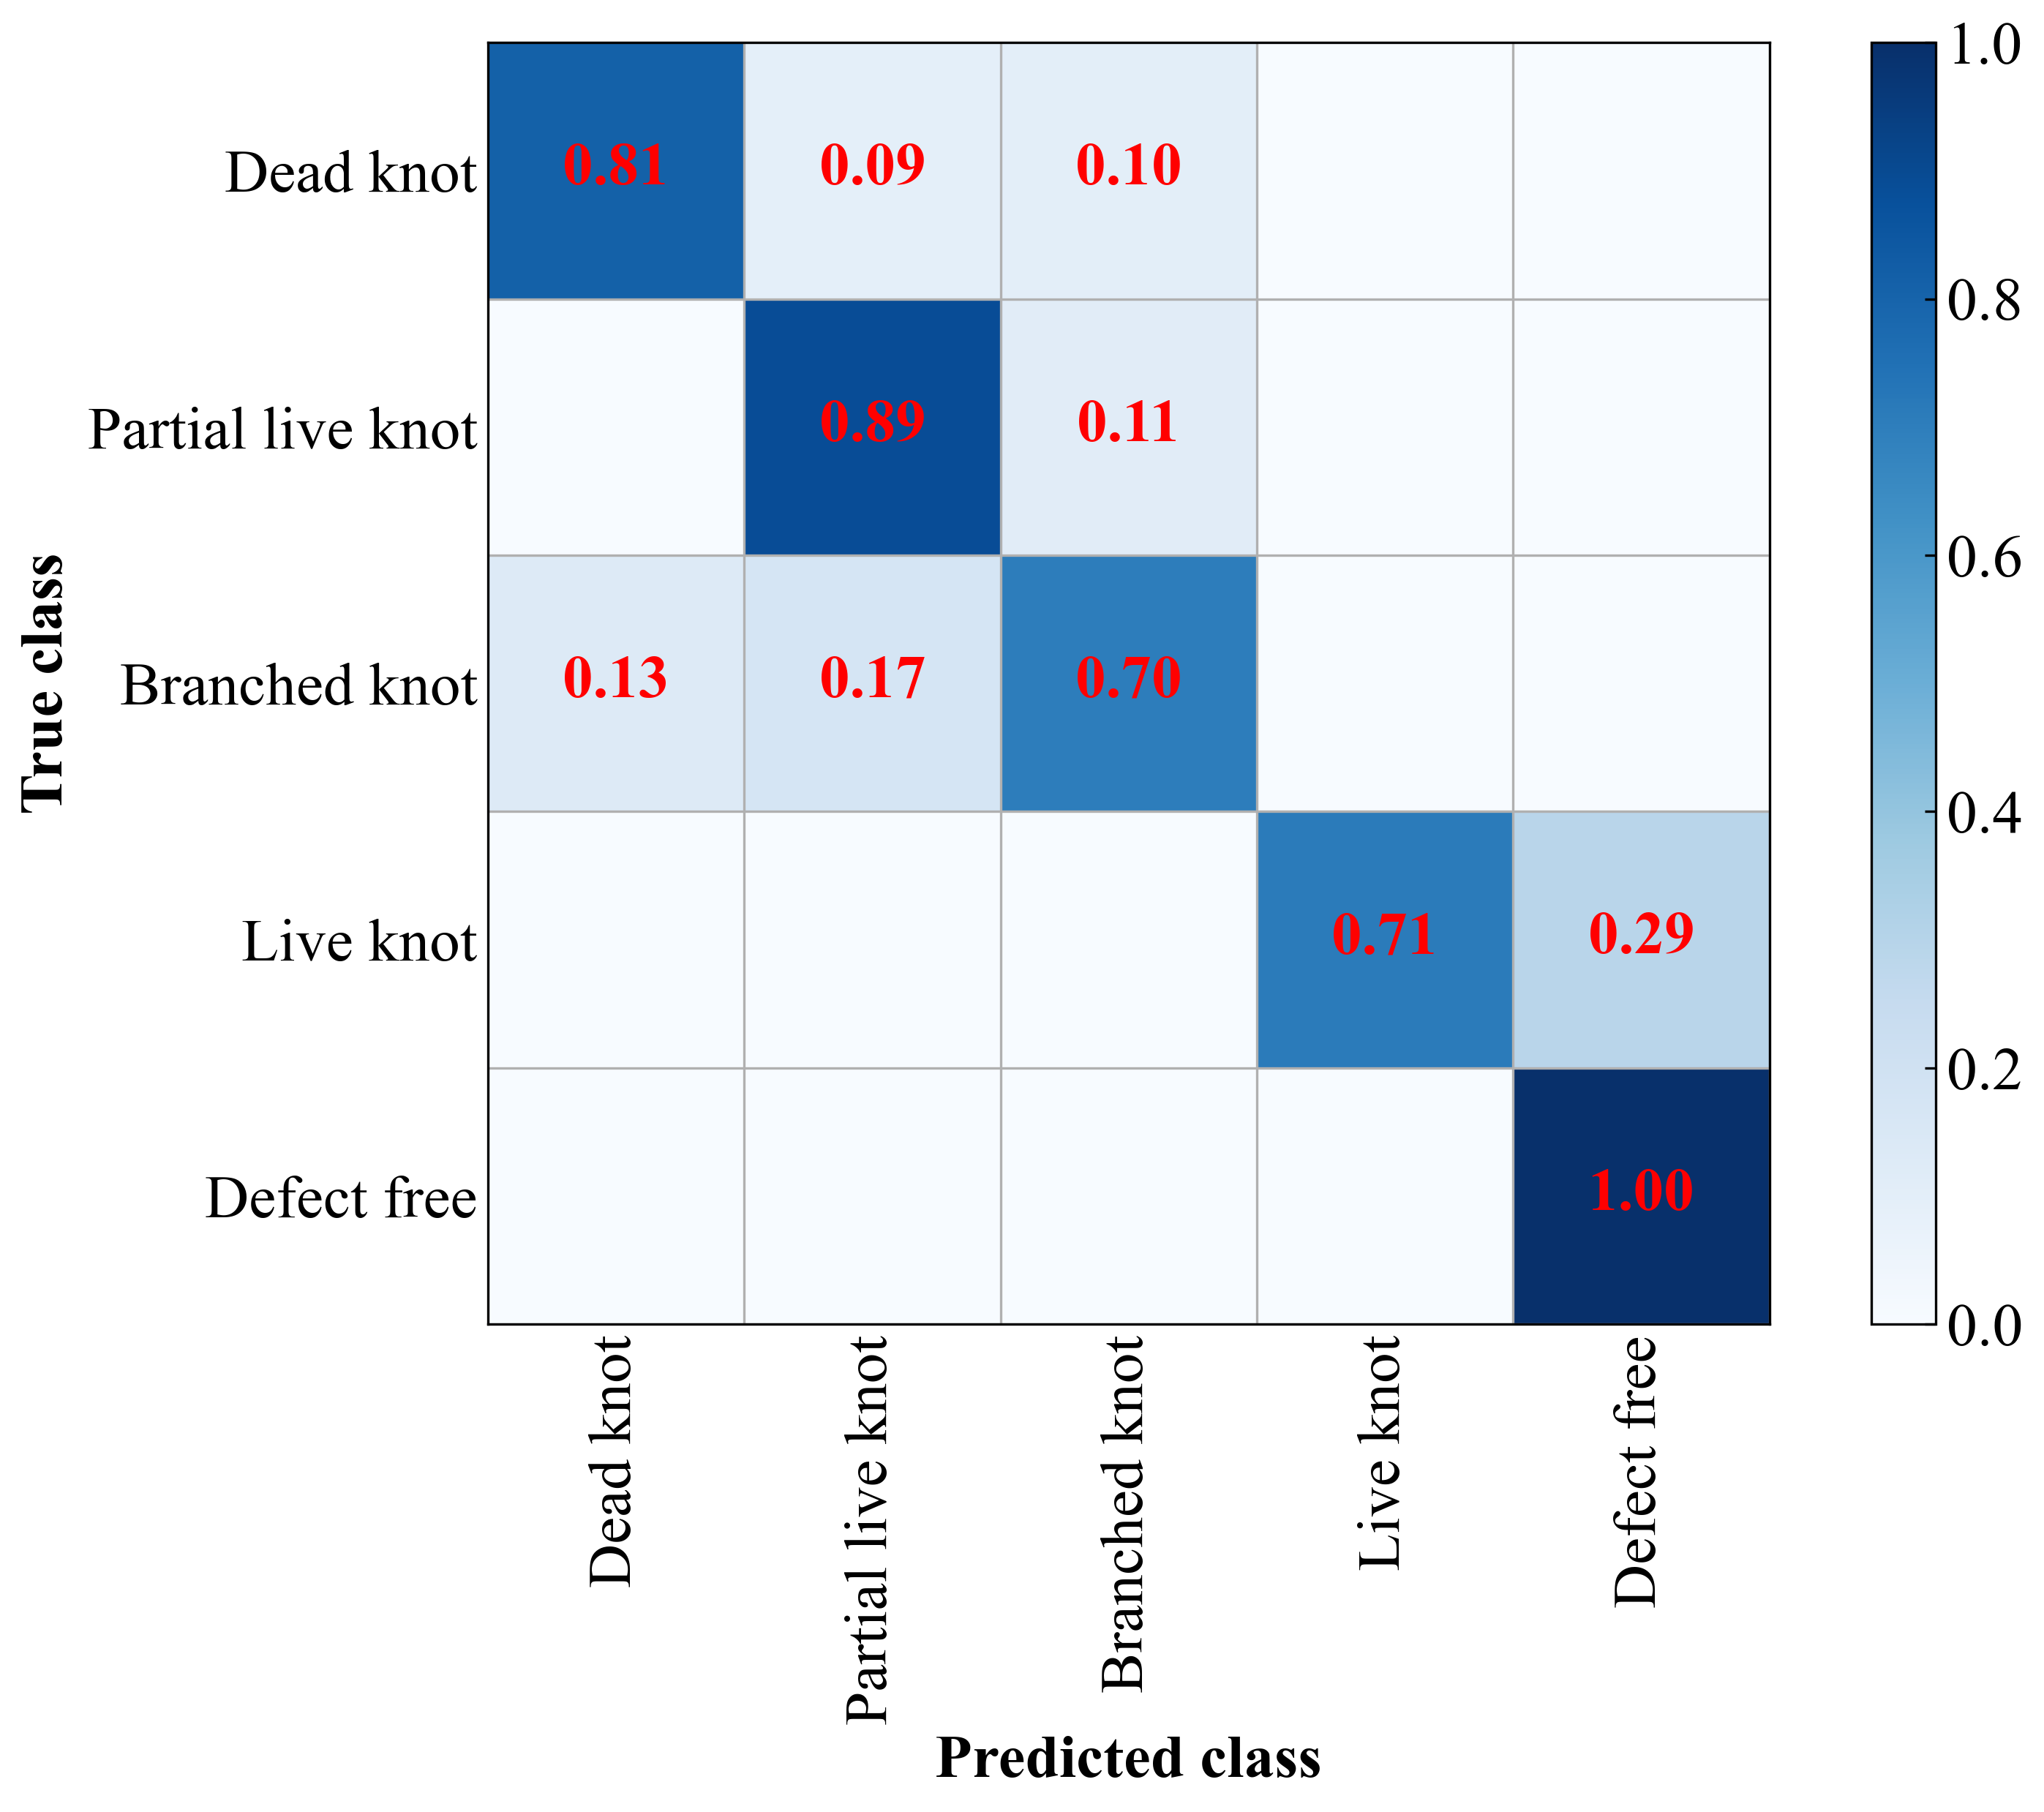

In [106]:
# confusion_matrix (Species level)
# func: matrix plotting
def plot_confusion_matrix(x, labels, title = 'Confusion Matrix'):
    plt.imshow(x, interpolation = 'nearest', cmap = 'Blues')
    #plt.title(title)
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 20
    plt.colorbar()
    
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels, rotation = 90)
    plt.yticks(xlocations, labels)
    font = {'family':'Times New Roman', 'weight':'bold', 'size':'larger', 'color':'black'}
    plt.ylabel('True class', fontsize = 20, fontdict = font)
    plt.xlabel('Predicted class', fontsize = 20, fontdict = font)
    plt.xticks(fontproperties = 'Times New Roman', size = 20)
    plt.yticks(fontproperties = 'Times New Roman', size = 20)
## func end
L1 = 'Dead knot'
L2 = 'Partial live knot'
L3 = 'Branched knot'
L4 = 'Live knot'
L5 = 'Defect free'
label = [L1, L2, L3, L4, L5]

tick_marks = np.array(range(len(label))) + 0.5
#y_true = acc[2]
#y_pred = acc[1]
y_pre = y_pre.reshape(y_pre.shape[0])
y_real = y_real.reshape(y_real.shape[0])
print(type(y_real), y_real.dtype, y_real.shape, y_pre.shape, np.max(y_real))
#cm = confusion_matrix(y_real, y_pre)
#np.save('cm_inceptin', cm)
#np.save('y_pre_inceptin', y_pre)
#np.save('y_real_inceptin', y_real)
#cm1 = np.sum(cm, axis = 0) # TP + FP
#cm2 = np.sum(cm, axis = 1) # TP + FN
np.set_printoptions(precision = 2)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
#cm_normalized = cm
dia = np.diagonal(cm)
#print(cm, cm1, cm2)
print('precision', dia / cm1)
print('recall', dia / cm2)
print('F1', dia * 2 / (cm1 + cm2))
print('F1_mean', np.mean(dia * 2 / (cm1 + cm2)))

#print('recall', t2)
#F1 = 1 / t1
#print(np.sum(cm, axis = 0))


plt.figure(figsize = (12, 8), dpi = 300)

ind_array = np.arange(len(label))
x, y = np.meshgrid(ind_array, ind_array)
#print(x.shape, y)
font = {'family':'Times New Roman', 'weight':'bold', 'size':'larger'}
for x_val, y_val in zip(x.flatten(), y.flatten()):
    #print(x_val, y_val)
    c = cm_normalized[y_val][x_val]
    if c > 0.0:
        plt.text(x_val, y_val, "%0.2f" % (c,), color = 'red', font_properties = font, fontsize = 20, va = 'center', ha = 'center')

# offset the tick
plt.gca().set_xticks(tick_marks, minor = True)
plt.gca().set_yticks(tick_marks, minor = True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.grid(True, which = 'minor', linestyle = '-')
plt.gcf().subplots_adjust(bottom = 0.15)

plot_confusion_matrix(cm_normalized, label, title = 'Normalized confusion matrix')
plt.savefig('Loss_plot.jpg', bbox_inches = 'tight')
plt.savefig('confusion_matrix_newmodel.jpg', format = 'jpg', bbox_inches = 'tight')
plt.show()

In [13]:
# Genus level accuracy comupting
b1 = 900
b2 = 930
print(y_real[b1:b2])
def StoG(x):
    # change number of Species into Genus
    # x-input vecter
    # 7-17
    y = (x > 6.9) * 4
    # 5, 6
    y1 = (x > 4.9)
    y2 = (x < 6.1)
    y = (y1 == y2) * 3 + y
    # 3, 4
    y1 = (x > 2.9)
    y2 = (x < 4.1)
    y = (y1 == y2) * 2 + y
    # 1, 2
    y1 = (x > 0.9)
    y2 = (x < 2.1)
    y = (y1 == y2) * 1 + y
    return y
y_real = StoG(y_real)
y_pre = StoG(y_pre)
# accuracy computing
Acc = (y_real == y_pre) * 1
Acc = np.sum(Acc) / val2[0]
print(y_real[b1:b2])
print(y_pre[b1:b2])
print(np.max(y_real), np.max(y_pre))
print('Acc =', Acc)

[ 7 14  2 16  2 16  9  0  7 14  7 16  5  9  7 17 12  6 15  1  3 12  0  5
  3  9 10  6  0  3]
[4 4 1 4 1 4 4 0 4 4 4 4 3 4 4 4 4 3 4 1 2 4 0 3 2 4 4 3 0 2]
[4 4 1 4 1 4 4 0 4 4 4 4 3 4 4 4 4 3 4 1 2 4 0 3 2 4 4 3 0 2]
4 4
Acc = 0.9769269776876268


<class 'numpy.ndarray'> (3944,) (3944,) 4
[[ 264    8    0    1   11]
 [  20  451    0    2    7]
 [   0    0  648    0    0]
 [   0    7    0  231   18]
 [   4    4    1    8 2259]]


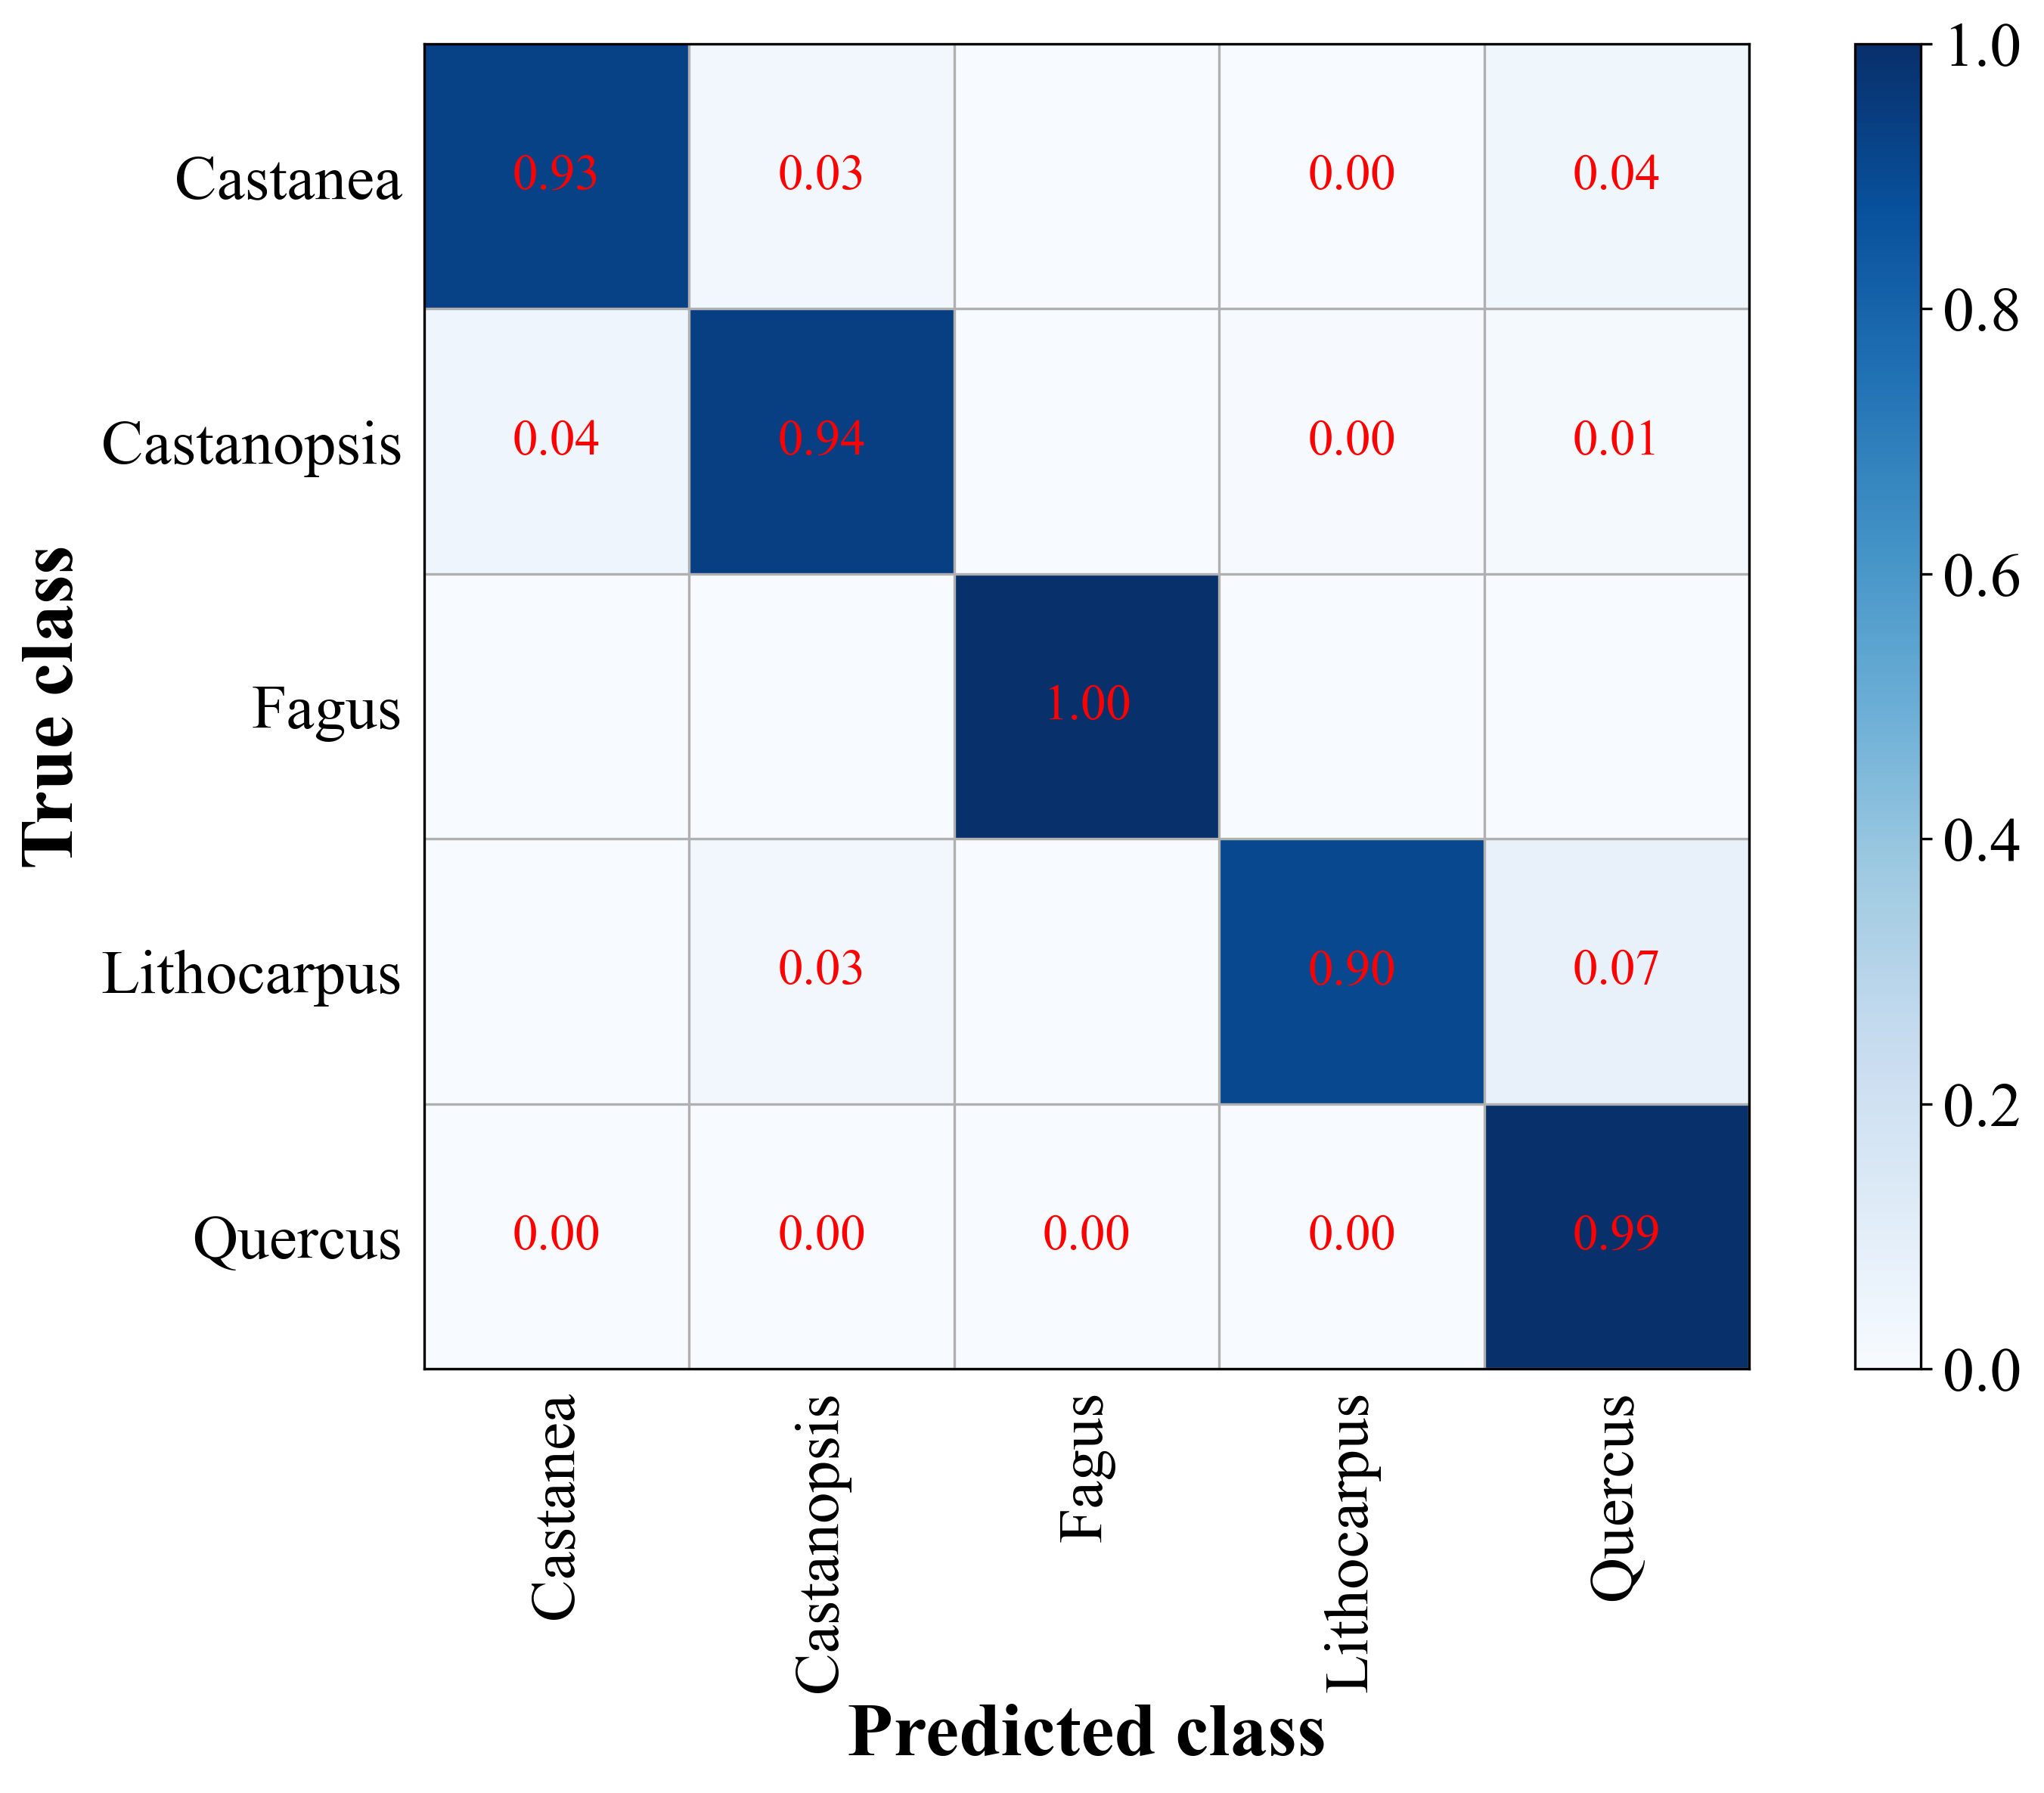

In [23]:
# confusion_matrix generation(Genus level)
def plot_confusion_matrix(x, labels, title = 'Confusion Matrix'):
    plt.imshow(x, interpolation = 'nearest', cmap = 'Blues')
    #plt.title(title)
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = '20'
    plt.colorbar()
    
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels, rotation = 90)
    plt.yticks(xlocations, labels)
    font = {'family':'Times New Roman', 'weight':'bold', 'size':'larger', 'color':'black'}
    plt.ylabel('True class', fontsize = 24, fontdict = font)
    plt.xlabel('Predicted class', fontsize = 24, fontdict = font)
    plt.xticks(fontproperties = 'Times New Roman', size = 20)
    plt.yticks(fontproperties = 'Times New Roman', size = 20)
    
label = ['Castanea', 'Castanopsis', 'Fagus', 'Lithocarpus', 'Quercus']
tick_marks = np.array(range(len(label))) + 0.5
#y_true = acc[2]
#y_pred = acc[1]
print(type(y_real), y_real.shape, y_pre.shape, np.max(y_real))
cm = confusion_matrix(y_real, y_pre)
np.set_printoptions(precision = 2)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
#cm_normalized = cm
print(cm)
plt.figure(figsize = (12, 8), dpi = 300)

ind_array = np.arange(len(label))
x, y = np.meshgrid(ind_array, ind_array)
#print(x.shape, y)
for x_val, y_val in zip(x.flatten(), y.flatten()):
    #print(x_val, y_val)
    c = cm_normalized[y_val][x_val]
    if c > 0.0:
        plt.text(x_val, y_val, "%0.2f" % (c,), color = 'red', fontsize = 16, va = 'center', ha = 'center')

# offset the tick
plt.gca().set_xticks(tick_marks, minor = True)
plt.gca().set_yticks(tick_marks, minor = True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.grid(True, which = 'minor', linestyle = '-')
plt.gcf().subplots_adjust(bottom = 0.15)
 
plot_confusion_matrix(cm_normalized, label, title = 'Normalized confusion matrix')
plt.savefig('confusion_matrix_Genus.jpg', format = 'jpg', bbox_inches = 'tight')
plt.show()

<class 'numpy.ndarray'> int64 (2258,) (2258,) 10
[[108   1   2   0  28  30  23  12  25   0   0]
 [  3 124   2   4   5   1   6   5   0  20   5]
 [  8   3 365   0   1   0   0   0   6  42   1]
 [  0  25   2  15   1   0   0   0   2  16   2]
 [ 13   4   0   0 132  15   7   0   3   1   0]
 [ 21   4   0   0  37  39  51   2  57   0   1]
 [ 23   3   0   0   7  22 188   2  22   1   1]
 [  8   1   0   0   1   0   1 122   7   0   0]
 [ 22   1   0   1  10  22  54   5 183   1   2]
 [  3   8  45   2   0   0   0   0   0 128   0]
 [  0  50   0   6   1   0   0   0   0   7  18]]


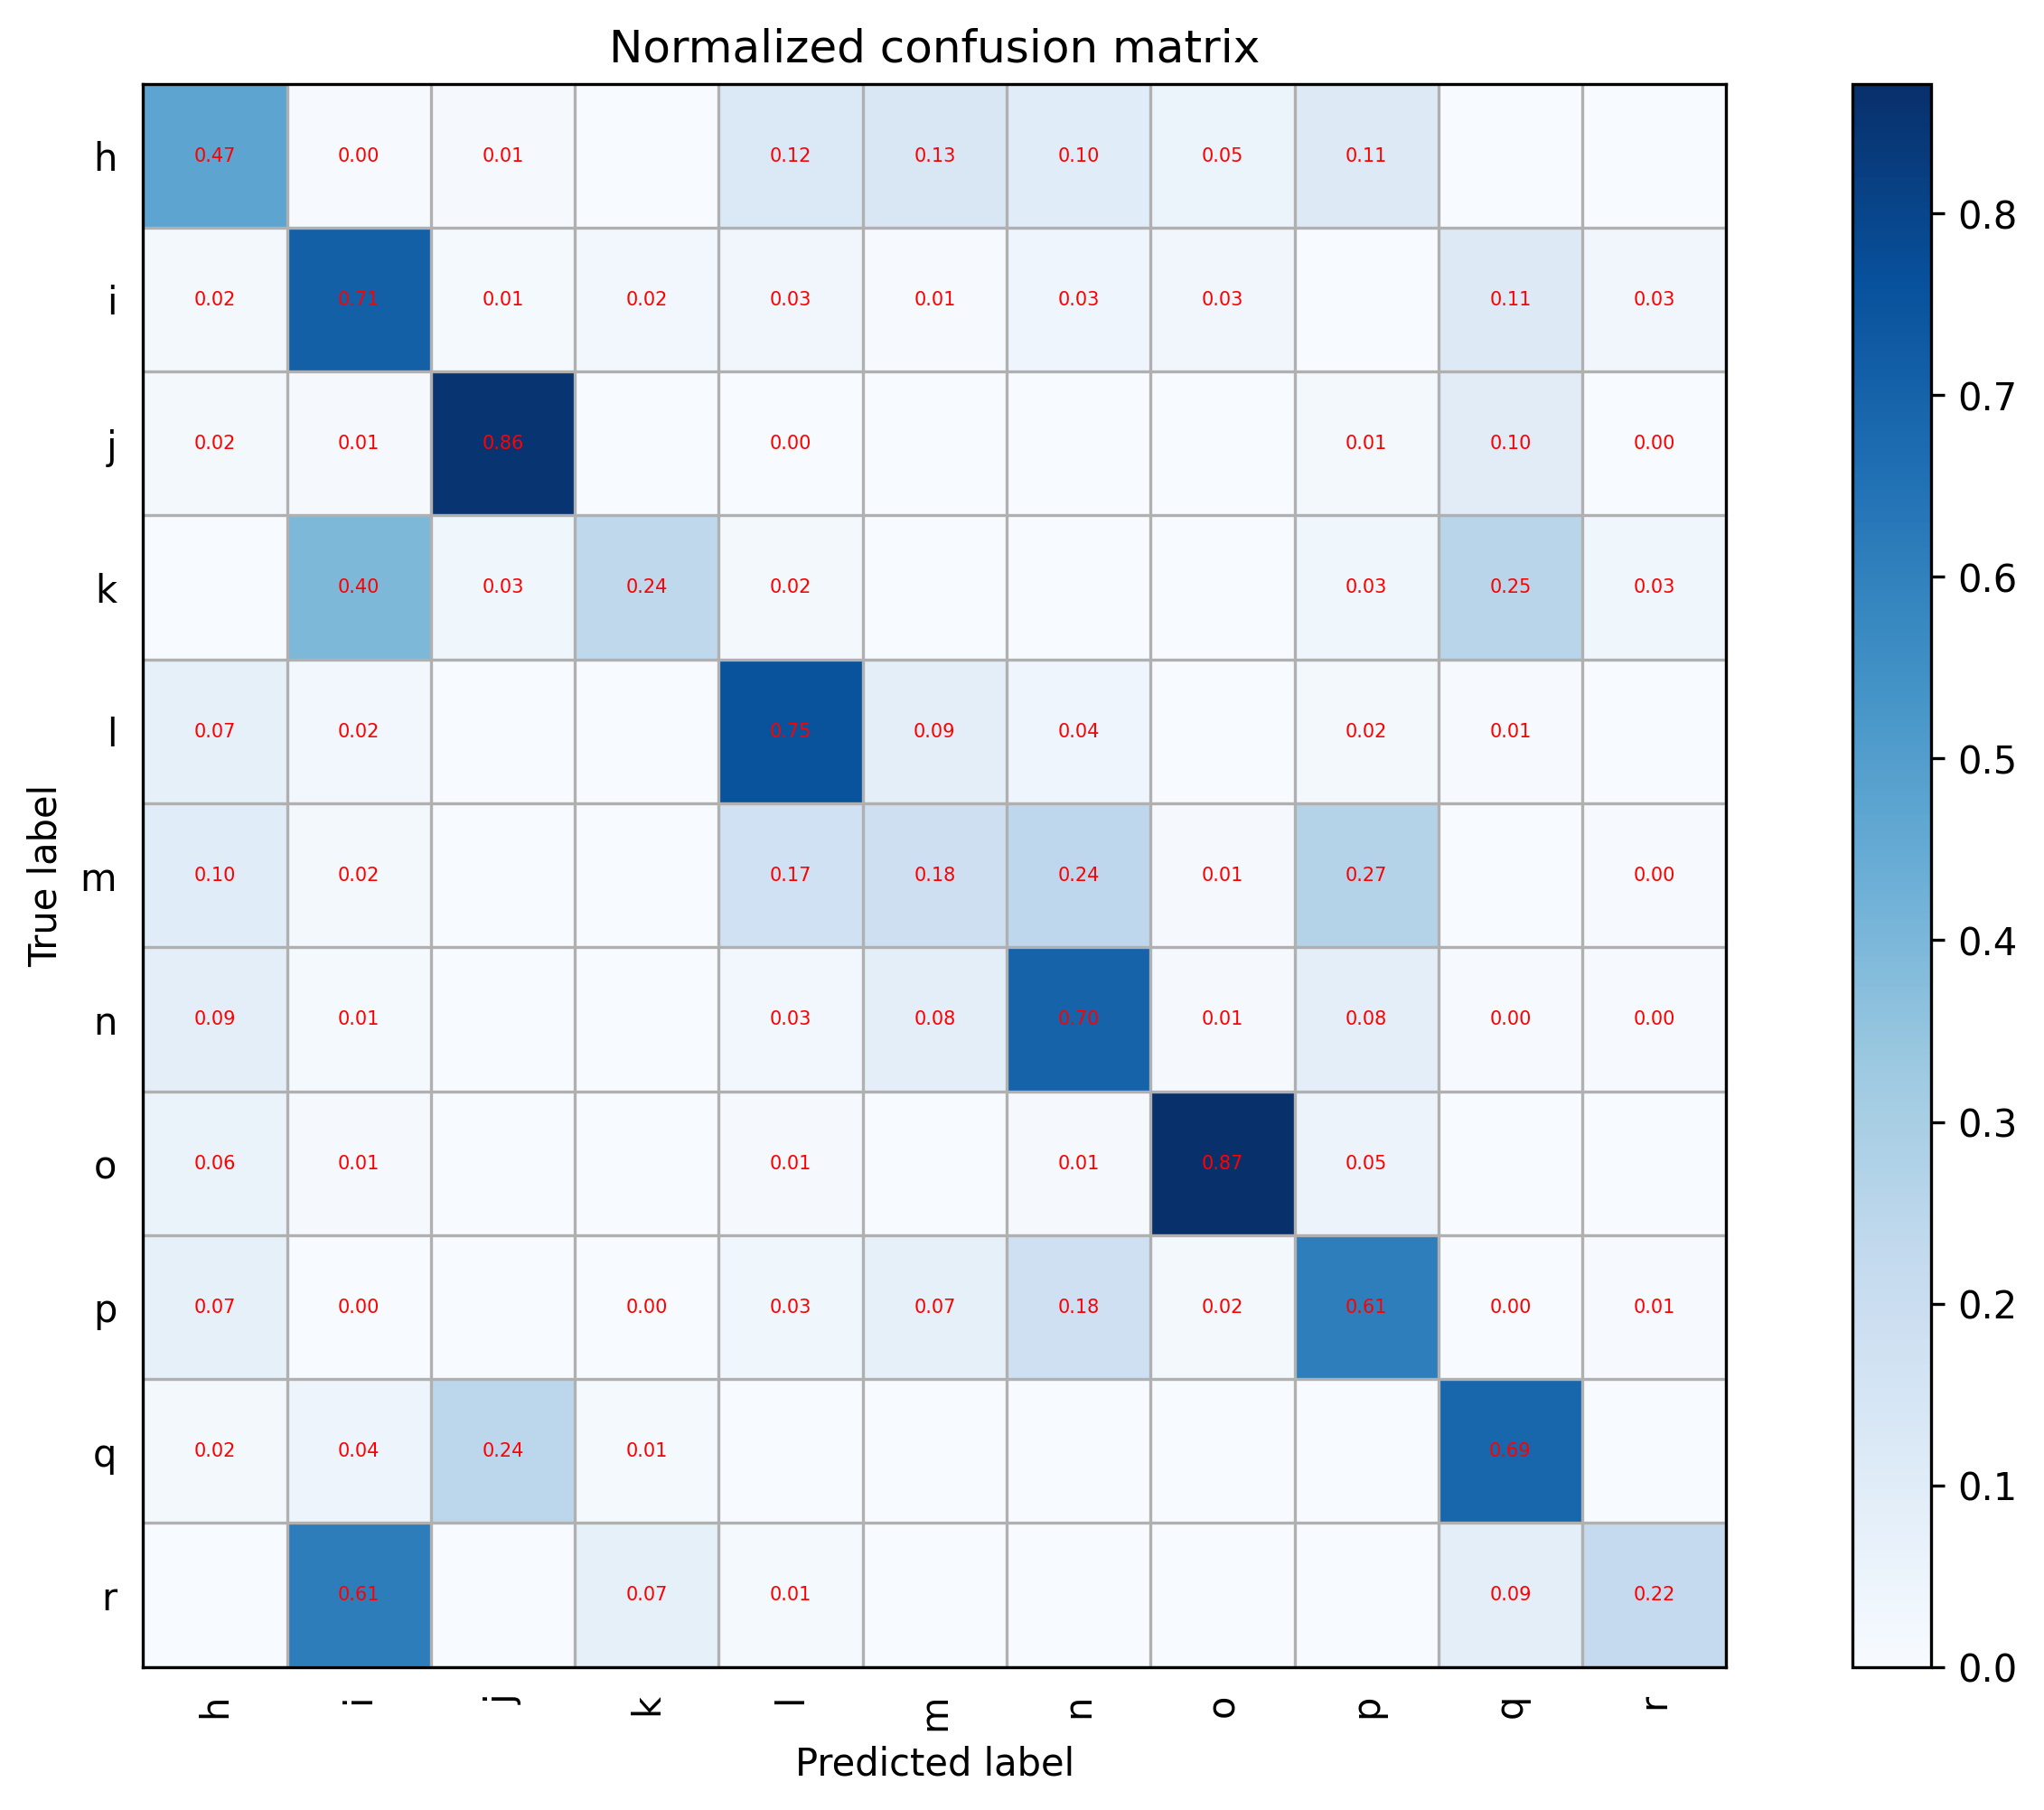

In [42]:
# confusion_matrix (Sub Species level)
label = ['h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r']
tick_marks = np.array(range(len(label))) + 0.5
#y_true = acc[2]
#y_pred = acc[1]
print(type(y_real), y_real.dtype, y_real.shape, y_pre.shape, np.max(y_real))
cm = confusion_matrix(y_real, y_pre)
np.set_printoptions(precision = 2)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
#cm_normalized = cm
print(cm)
plt.figure(figsize = (12, 8), dpi = 300)

ind_array = np.arange(len(label))
x, y = np.meshgrid(ind_array, ind_array)
#print(x.shape, y)
for x_val, y_val in zip(x.flatten(), y.flatten()):
    #print(x_val, y_val)
    c = cm_normalized[y_val][x_val]
    if c > 0.0:
        plt.text(x_val, y_val, "%0.2f" % (c,), color = 'red', fontsize = 5, va = 'center', ha = 'center')

# offset the tick
plt.gca().set_xticks(tick_marks, minor = True)
plt.gca().set_yticks(tick_marks, minor = True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.grid(True, which = 'minor', linestyle = '-')
plt.gcf().subplots_adjust(bottom = 0.15)
 
plot_confusion_matrix(cm_normalized, label, title = 'Normalized confusion matrix')
plt.savefig('confusion_matrix.jpg', format = 'jpg', bbox_inches = 'tight')
plt.show()

In [33]:
import matplotlib
matplotlib.image.imsave('numwood2_2.png', (x_train[1, :, :, :] + 0.0) / 1.)

In [15]:
## 模型保存 ##
saver = tf.train.Saver()
trainResultPath = 'E:/pythonworkspace/RCNN/model_dark2/f1'
print('saving...')
saver.save(sess, trainResultPath)

ValueError: No variables to save

In [30]:
## 模型加载 ##
saver = tf.train.Saver()
trainResultPath = 'E:/pythonworkspace/RCNN/model_light/f1'
saver.restore(sess, trainResultPath)# 加载到当前环境中

INFO:tensorflow:Restoring parameters from E:/pythonworkspace/RCNN/model_light/f1


In [18]:
logdir = 'E:/pythonworkspace/log'
writer = tf.summary.FileWriter(logdir, tf.get_default_graph())
writer.close()

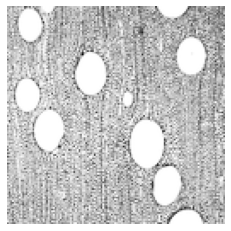

(9784, 128, 128, 1)


In [19]:
plt.imshow(x_origin[2, :, :, 0], cmap = 'Greys_r') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
np.save('labels', labels)
print(x_origin.shape)

(200,)
(200,)


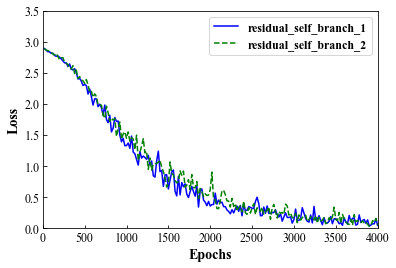

In [22]:
axis_x = np.arange(1, 200 + 1, 1)
b = np.arange(0, 4000, 20) # 从0开始间隔为10的等差数列
aa = np.load('residual_self.npy')
axis_y1 = aa[b]
print(axis_y1.shape)
print(axis_x.shape)
aa = np.load('residual_self_inception.npy')
axis_y2 = aa[b]

#print(axis_x.shape, axis_y.shape)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(axis_x * 20, axis_y1, c = 'blue', linestyle = '-', label = 'residual_self_branch_1')
plt.plot(axis_x * 20, axis_y2, c = 'green', linestyle = '--', label = 'residual_self_branch_2')
#plt.plot(axis_x * 20, axis_y3, c = 'red', linestyle = '--', label = 'residual_self_branch_3')
#plt.plot(axis_x * 20, axis_y4, c = 'c', linestyle = '--', label = 'residual_self_branch_4')
#plt.plot(axis_x * 20, axis_y5, c = 'm', linestyle = ':', label = 'Self-adapt-inception')
#plt.plot(axis_x * 10, axis_y4, c = 'blue', linestyle = ':', marker = '.', label = 'Self-adapt-3x3')

font = {'family':'Times New Roman', 'weight':'bold', 'style':'normal', 'size':12}
Lg = plt.legend(prop = font) # display lengend
font = {'family':'Times New Roman', 'weight':'bold', 'size':'larger', 'color':'black'}
plt.xlabel('Epochs', fontsize = 14, fontdict = font)
plt.ylabel('Loss', fontsize = 14, fontdict = font)
x_major_locator = MultipleLocator(500) # x axis interval setting
y_major_locator = MultipleLocator(0.5) # y axis interval setting
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xticks(fontproperties = 'Times New Roman', size = 12)
plt.yticks(fontproperties = 'Times New Roman', size = 12)
plt.ylim(0, 3.5)
plt.xlim(0, 4000)
#y_values=list(range(11))

plt.savefig('Loss_plot2.jpg', bbox_inches = 'tight')
plt.show()

In [50]:
r = 8
c = 7
w = tf.Variable(tf.truncated_normal((5, 5, 4, 9), stddev = 0.1), dtype = tf.float32, name = 'w')
print(w)
x = np.ones([7, 8, 8, 4], dtype = np.float32)
y = tf.nn.conv2d(x, w, strides = [1, 1, 1, 1], padding = "SAME", name = 'y')
#s1 = w.shape[1] - 7 + 0
print(y)
d = tf.nn.avg_pool(y, ksize = [1, 7, 7, 1], strides = [1, 2, 2, 1], padding = "VALID", name = 'd') # pooling 1 x 1
print(d)
d2 = tf.reduce_mean(d, axis = [1, 2], name = 'd2')
print(d2)
prediction = tf.nn.softmax(d2, name = 'prediction') # 判别结果
print(prediction)
#print(x.shape,x)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
result = sess.run([prediction]) # discriminator训练
print(result[0].shape)

<tf.Variable 'w_48:0' shape=(5, 5, 4, 9) dtype=float32>
Tensor("y_11:0", shape=(7, 8, 8, 9), dtype=float32)
Tensor("d_39:0", shape=(7, 1, 1, 9), dtype=float32)
Tensor("d2_1:0", shape=(7, 9), dtype=float32)
Tensor("prediction_11:0", shape=(7, 9), dtype=float32)
(7, 9)
